# **Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

abdo edit

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

# Download the Data

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [5]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe() # work on numerical comlumns only

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
mean => average
total_rooms => 39320 => outlayer


In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [14]:
# In most cases, the data we receive from any source often contains numerous false and missing values. 
# We clean these using pandas.
# First, we'll identify them.
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# we'll employ a tried-and-true tactic: 
# filling those voids with the median of the column's values. 
# It's a straightforward yet powerful method widely favored in the realm of data science 
# for its efficiency in handling missing data.
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(housing["total_bedrooms"].median())
# there is other methods to handle missing values:
#TODO:

In [16]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
housing.isna()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value  \
0           False       False          False               False   
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4           False       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
20635            False  
20636            False  
20637            False  
20638            False  
20639            False  

[20640 rows x 10 columns]

In [18]:
housing.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [19]:
housing[housing.isna().any(axis=1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [17]:
housing2 = housing.dropna(inplace=True)

In [18]:
housing[housing.isna().any(axis=1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [16]:
housing2[housing2.isna().any(axis=1)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [20]:
# The "ocean proximity" column contains string values, unsuitable for most machine-learning models.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
# To overcome this obstacle, we'll need to convert these strings into numerical values
housing["ocean_proximity"] = housing["ocean_proximity"].map({'NEAR BAY':0, '<1H OCEAN':3, 'INLAND':4, 'NEAR OCEAN':2,'ISLAND':1})

In [ ]:
#TODO: try remove 'ISLAND' rows to overcome.

In [23]:
housing["ocean_proximity"].value_counts()

3    9136
4    6551
2    2658
0    2290
1       5
Name: ocean_proximity, dtype: int64

In [26]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype(float)

In [27]:
housing["ocean_proximity"].value_counts()

3.0    9136
4.0    6551
2.0    2658
0.0    2290
1.0       5
Name: ocean_proximity, dtype: int64

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [ ]:
# Features Engineering:

In [19]:
housing.sort_values("population")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
12458    -114.62     33.62                26.0         18.0             3.0   
3126     -117.79     35.21                 4.0          2.0             2.0   
3125     -117.76     35.22                 4.0         18.0             3.0   
12286    -116.95     33.86                 1.0          6.0             2.0   
...          ...       ...                 ...          ...             ...   
6057     -117.78     34.03                 8.0      32054.0          5290.0   
10309    -117.74     33.89                 4.0      37937.0          5471.0   
13139    -121.44     38.43                 3.0      39320.0          6210.0   
9880     -121.79     36.64                11.0      32627.0          6445.0   
15360    -117.42     33.35                14.0      25135.0          4819.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
12458         5.0         3.0         0.5360            275000.0   
3126          6.0         2.0         2.3750            137500.0   
3125          8.0         6.0         1.6250            275000.0   
12286         8.0         2.0         1.6250             55000.0   
...           ...         ...            ...                 ...   
6057      15507.0      5050.0         6.0191            253900.0   
10309     16122.0      5189.0         7.4947            366300.0   
13139     16305.0      5358.0         4.9516            153700.0   
9880      28566.0      6082.0         2.3087            118800.0   
15360     35682.0      4769.0         2.5729            134400.0   

      ocean_proximity  
5342        <1H OCEAN  
12458          INLAND  
3126           INLAND  
3125           INLAND  
12286          INLAND  
...               ...  
6057        <1H OCEAN  
10309       <1H OCEAN  
13139          INLAND  
9880        <1H OCEAN  
15360       <1H OCEAN  

[20433 rows x 10 columns]

In [20]:
housing["total_rooms_over_population"] = housing["total_rooms"] / housing["population"]

In [21]:
housing.sort_values("total_rooms_over_population")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19006    -121.98     38.32                45.0         19.0             5.0   
3364     -120.51     40.41                36.0         36.0             8.0   
16669    -120.70     35.32                46.0        118.0            17.0   
13034    -121.15     38.69                52.0        240.0            44.0   
9172     -118.59     34.47                 5.0        538.0            98.0   
...          ...       ...                 ...          ...             ...   
12447    -114.49     33.97                17.0       2809.0           635.0   
11862    -121.25     40.27                25.0        958.0           245.0   
11849    -121.00     39.75                 8.0       1116.0           214.0   
1914     -120.10     38.91                33.0       1561.0           282.0   
1979     -120.08     38.80                34.0       1988.0           511.0   

       population  households  median_income  median_house_value  \
19006      7460.0         6.0        10.2264            137500.0   
3364       4198.0         7.0         5.5179             67500.0   
16669      6532.0        13.0         4.2639            350000.0   
13034      6675.0        29.0         6.1359            225000.0   
9172       8733.0       105.0         4.2391            154600.0   
...           ...         ...            ...                 ...   
12447        83.0        45.0         1.6154             87500.0   
11862        28.0        16.0         2.6250             67500.0   
11849        27.0        39.0         2.5893             83000.0   
1914         30.0        11.0         1.8750            500001.0   
1979         36.0        15.0         4.6250            162500.0   

      ocean_proximity  total_rooms_over_population  
19006          INLAND                     0.002547  
3364           INLAND                     0.008576  
16669      NEAR OCEAN                     0.018065  
13034          INLAND                     0.035955  
9172           INLAND                     0.061605  
...               ...                          ...  
12447          INLAND                    33.843373  
11862          INLAND                    34.214286  
11849          INLAND                    41.333333  
1914           INLAND                    52.033333  
1979           INLAND                    55.222222  

[20433 rows x 11 columns]

In [23]:
housing.loc[(housing['total_rooms_over_population'] < 1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
73       -122.29     37.81                46.0         12.0             4.0   
88       -122.27     37.80                10.0        105.0            42.0   
89       -122.27     37.80                52.0        249.0            78.0   
91       -122.28     37.80                52.0        215.0            87.0   
92       -122.28     37.80                52.0         96.0            31.0   
...          ...       ...                 ...          ...             ...   
20324    -119.12     34.25                31.0        737.0           146.0   
20352    -119.09     34.22                 8.0         40.0            10.0   
20353    -119.05     34.13                12.0         57.0            22.0   
20527    -121.79     38.54                 7.0       1777.0           513.0   
20548    -121.76     38.68                38.0        674.0           178.0   

       population  households  median_income  median_house_value  \
73           18.0         7.0         0.4999             67500.0   
88          125.0        39.0         0.9722            137500.0   
89          396.0        85.0         1.2434            500001.0   
91          904.0        88.0         0.8668            137500.0   
92          191.0        34.0         0.7500            162500.0   
...           ...         ...            ...                 ...   
20324      1436.0       168.0         3.5625            194100.0   
20352       309.0        16.0         4.0208             52500.0   
20353        69.0        15.0         5.0066            275000.0   
20527      4479.0       504.0         1.4653            310000.0   
20548       701.0       189.0         1.3942             69400.0   

      ocean_proximity  total_rooms_over_population  
73           NEAR BAY                     0.666667  
88           NEAR BAY                     0.840000  
89           NEAR BAY                     0.628788  
91           NEAR BAY                     0.237832  
92           NEAR BAY                     0.502618  
...               ...                          ...  
20324      NEAR OCEAN                     0.513231  
20352      NEAR OCEAN                     0.129450  
20353      NEAR OCEAN                     0.826087  
20527          INLAND                     0.396740  
20548          INLAND                     0.961484  

[1425 rows x 11 columns]

In [24]:
housing["total_bedrooms_over_population"] = housing["total_bedrooms"] / housing["population"]

In [26]:
housing.loc[(housing['total_bedrooms_over_population'] > 1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
710      -122.08     37.68                26.0       1167.0           370.0   
854      -122.01     37.59                 2.0        838.0           295.0   
1024     -120.00     38.52                16.0       3045.0           543.0   
1102     -121.54     40.06                17.0        858.0           262.0   
1233     -120.34     38.23                10.0       3757.0           722.0   
...          ...       ...                 ...          ...             ...   
19977    -118.70     35.82                20.0       4642.0          1300.0   
20093    -120.12     38.12                37.0       3355.0           666.0   
20094    -120.03     38.19                26.0       7005.0          1358.0   
20112    -119.93     37.85                18.0        473.0           115.0   
20113    -119.57     37.94                17.0        346.0           130.0   

       population  households  median_income  median_house_value  \
710         253.0       137.0         2.4196            275000.0   
854         240.0       149.0         2.8750            237500.0   
1024        202.0       102.0         3.1500            140600.0   
1102         47.0        27.0         2.4028             67500.0   
1233        546.0       223.0         3.7500            121400.0   
...           ...         ...            ...                 ...   
19977       658.0       247.0         2.3937             82100.0   
20093       338.0       136.0         2.0625             88900.0   
20094       416.0       189.0         2.1250            132500.0   
20112        88.0        41.0         4.0833            137500.0   
20113        51.0        20.0         3.4861            137500.0   

      ocean_proximity  total_rooms_over_population  \
710          NEAR BAY                     4.612648   
854          NEAR BAY                     3.491667   
1024           INLAND                    15.074257   
1102           INLAND                    18.255319   
1233           INLAND                     6.880952   
...               ...                          ...   
19977          INLAND                     7.054711   
20093          INLAND                     9.926036   
20094          INLAND                    16.838942   
20112          INLAND                     5.375000   
20113          INLAND                     6.784314   

       total_bedrooms_over_population  
710                          1.462451  
854                          1.229167  
1024                         2.688119  
1102                         5.574468  
1233                         1.322344  
...                               ...  
19977                        1.975684  
20093                        1.970414  
20094                        3.264423  
20112                        1.306818  
20113                        2.549020  

[184 rows x 12 columns]

In [31]:
housing.loc[(housing['total_bedrooms_over_population'] > 1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
710      -122.08     37.68                26.0       1167.0           370.0   
854      -122.01     37.59                 2.0        838.0           295.0   
1024     -120.00     38.52                16.0       3045.0           543.0   
1102     -121.54     40.06                17.0        858.0           262.0   
1233     -120.34     38.23                10.0       3757.0           722.0   
...          ...       ...                 ...          ...             ...   
19977    -118.70     35.82                20.0       4642.0          1300.0   
20093    -120.12     38.12                37.0       3355.0           666.0   
20094    -120.03     38.19                26.0       7005.0          1358.0   
20112    -119.93     37.85                18.0        473.0           115.0   
20113    -119.57     37.94                17.0        346.0           130.0   

       population  households  median_income  median_house_value  \
710         253.0       137.0         2.4196            275000.0   
854         240.0       149.0         2.8750            237500.0   
1024        202.0       102.0         3.1500            140600.0   
1102         47.0        27.0         2.4028             67500.0   
1233        546.0       223.0         3.7500            121400.0   
...           ...         ...            ...                 ...   
19977       658.0       247.0         2.3937             82100.0   
20093       338.0       136.0         2.0625             88900.0   
20094       416.0       189.0         2.1250            132500.0   
20112        88.0        41.0         4.0833            137500.0   
20113        51.0        20.0         3.4861            137500.0   

      ocean_proximity  total_rooms_over_population  \
710          NEAR BAY                     4.612648   
854          NEAR BAY                     3.491667   
1024           INLAND                    15.074257   
1102           INLAND                    18.255319   
1233           INLAND                     6.880952   
...               ...                          ...   
19977          INLAND                     7.054711   
20093          INLAND                     9.926036   
20094          INLAND                    16.838942   
20112          INLAND                     5.375000   
20113          INLAND                     6.784314   

       total_bedrooms_over_population  
710                          1.462451  
854                          1.229167  
1024                         2.688119  
1102                         5.574468  
1233                         1.322344  
...                               ...  
19977                        1.975684  
20093                        1.970414  
20094                        3.264423  
20112                        1.306818  
20113                        2.549020  

[184 rows x 12 columns]

<AxesSubplot:>

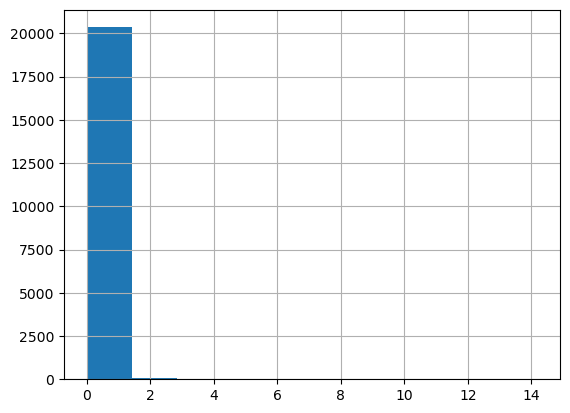

In [27]:
housing['total_bedrooms_over_population'].hist()

In [36]:
housing3 = housing.drop(housing[(housing['total_bedrooms_over_population'] > 1)].index)

In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       20433 non-null  float64
 1   latitude                        20433 non-null  float64
 2   housing_median_age              20433 non-null  float64
 3   total_rooms                     20433 non-null  float64
 4   total_bedrooms                  20433 non-null  float64
 5   population                      20433 non-null  float64
 6   households                      20433 non-null  float64
 7   median_income                   20433 non-null  float64
 8   median_house_value              20433 non-null  float64
 9   ocean_proximity                 20433 non-null  object 
 10  total_rooms_over_population     20433 non-null  float64
 11  total_bedrooms_over_population  20433 non-null  float64
dtypes: float64(11), object(1)
memory

In [39]:
housing3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20249 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       20249 non-null  float64
 1   latitude                        20249 non-null  float64
 2   housing_median_age              20249 non-null  float64
 3   total_rooms                     20249 non-null  float64
 4   total_bedrooms                  20249 non-null  float64
 5   population                      20249 non-null  float64
 6   households                      20249 non-null  float64
 7   median_income                   20249 non-null  float64
 8   median_house_value              20249 non-null  float64
 9   ocean_proximity                 20249 non-null  object 
 10  total_rooms_over_population     20249 non-null  float64
 11  total_bedrooms_over_population  20249 non-null  float64
dtypes: float64(11), object(1)
memory

In [40]:
housing.drop(housing[(housing['total_bedrooms_over_population'] > 1)].index, inplace=True)

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20249 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       20249 non-null  float64
 1   latitude                        20249 non-null  float64
 2   housing_median_age              20249 non-null  float64
 3   total_rooms                     20249 non-null  float64
 4   total_bedrooms                  20249 non-null  float64
 5   population                      20249 non-null  float64
 6   households                      20249 non-null  float64
 7   median_income                   20249 non-null  float64
 8   median_house_value              20249 non-null  float64
 9   ocean_proximity                 20249 non-null  object 
 10  total_rooms_over_population     20249 non-null  float64
 11  total_bedrooms_over_population  20249 non-null  float64
dtypes: float64(11), object(1)
memory

In [32]:
housing.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20433, dtype: bool

In [35]:
housing.loc[(housing.duplicated() == True)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, total_rooms_over_population, total_bedrooms_over_population]
Index: []

In [ ]:
housing.drop(housing[(housing.duplicated() == True)].index, inplace=True)

In [149]:
housing.head() # reteive first 5

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [150]:
housing.head(20) # reteive first 20

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY  
15       697.0       264.0         2.1250            140000.0        NEAR BAY  
16       793.0       331.0         2.7750            152500.0        NEAR BAY  
17       648.0       303.0         2.1202            155500.0        NEAR BAY  
18       990.0       419.0         1.9911            158700.0        NEAR BAY  
19       690.0       275.0         2.6033            162900.0        NEAR BAY

In [42]:
housing.head(-6) # reteive last 6 => not work

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20629    -121.39     39.12                28.0      10035.0          1856.0   
20630    -121.32     39.29                11.0       2640.0           505.0   
20631    -121.40     39.33                15.0       2655.0           493.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20629      6912.0      1818.0         2.0943            108300.0   
20630      1257.0       445.0         3.5673            112000.0   
20631      1200.0       432.0         3.5179            107200.0   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   

      ocean_proximity  total_rooms_over_population  \
0            NEAR BAY                     2.732919   
1            NEAR BAY                     2.956685   
2            NEAR BAY                     2.957661   
3            NEAR BAY                     2.283154   
4            NEAR BAY                     2.879646   
...               ...                          ...   
20629          INLAND                     1.451823   
20630          INLAND                     2.100239   
20631          INLAND                     2.212500   
20632          INLAND                     2.214900   
20633          INLAND                     1.922366   

       total_bedrooms_over_population  
0                            0.400621  
1                            0.460641  
2                            0.383065  
3                            0.421147  
4                            0.495575  
...                               ...  
20629                        0.268519  
20630                        0.401750  
20631                        0.410833  
20632                        0.397326  
20633                        0.380776  

[20243 rows x 12 columns]

Using pandas describe() to find outliers
After checking the data and dropping the columns, use .describe() to generate some summary statistics. Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers. 

df.describe()[[‘fare_amount’, ‘passenger_count’]]
    

In [30]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity  
count        20640.000000     20640.000000  
mean        206855.816909         2.855281  
std         115395.615874         1.193655  
min          14999.000000         0.000000  
25%         119600.000000         3.000000  
50%         179700.000000         3.000000  
75%         264725.000000         4.000000  
max         500001.000000         4.000000

In [ ]:
# Data Visualization:

Saving figure attribute_histogram_plots


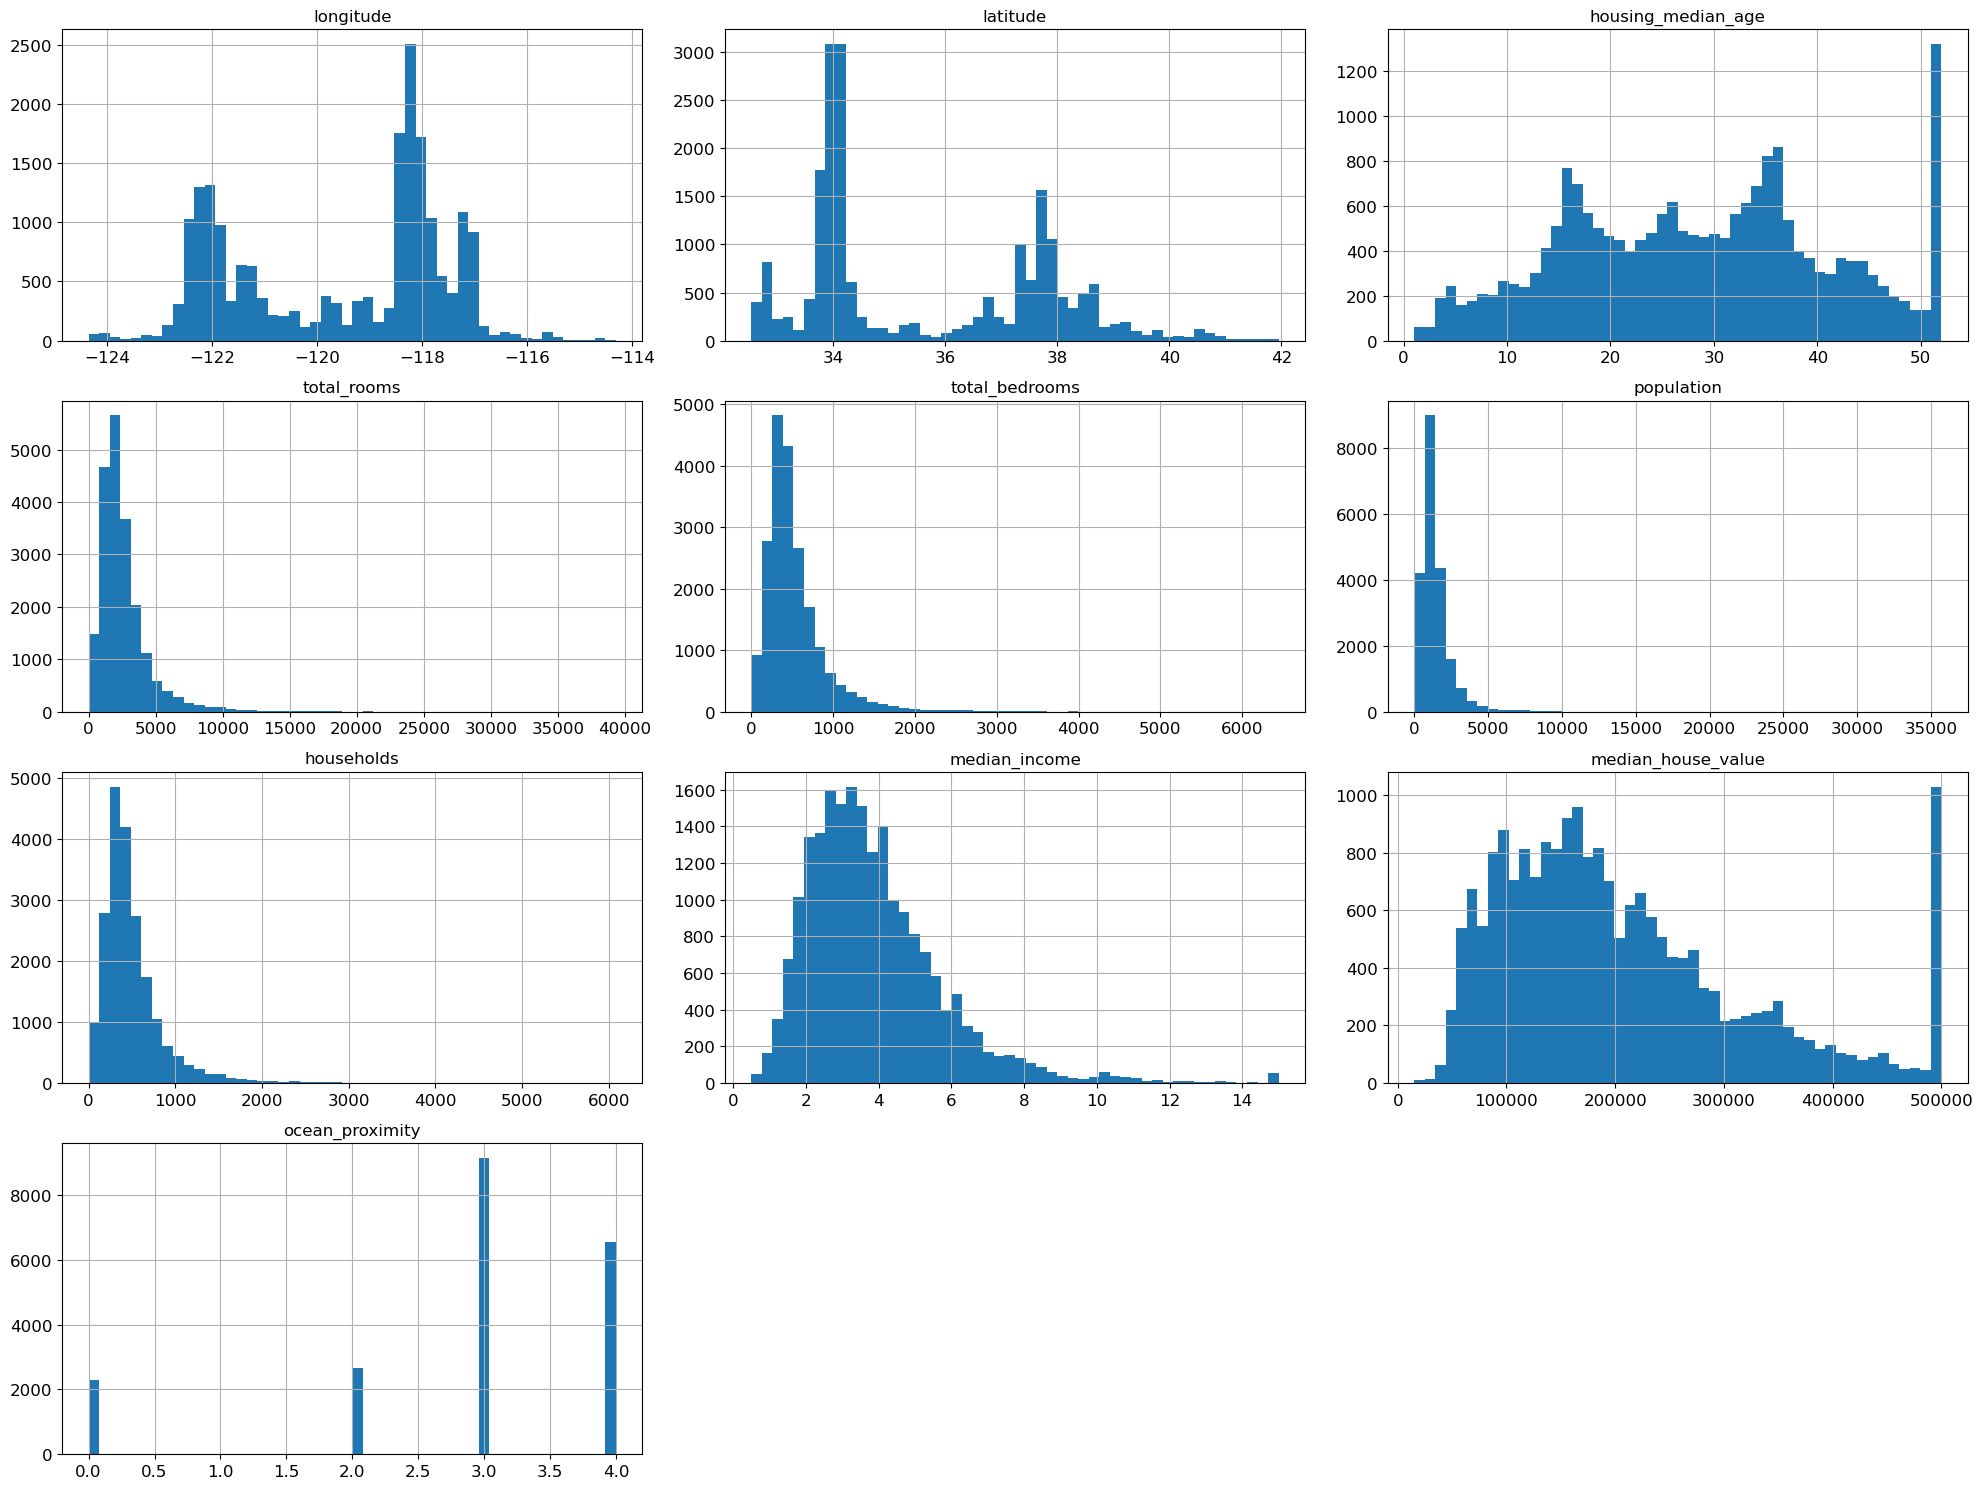

In [29]:
# describe numerical columns:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # => histogram, x=> column values, y=> repeated count.
save_fig("attribute_histogram_plots")
plt.show()
# in total_bedrooms => from 2000 upto 5000 there outlayers, not has repeat count a lot. must clear from data.
# total_rooms => from 10000 toup => it outlyaer
# population => from 5000
# house_hold => from 2000
# medain_income => from 11

# medain_income => represent salary, but it scale, we must ask data engineer team about each column, what represent, error in collection data, scale,..
# each number must multiply by 10,000$

# housing_median_age & median_house_value => has  outlayer from 5000.
# for housing_median_age not big issue but for column median_house_value is used to predect, so must arrange it, 
# solve1: ask team if there value more than 500,000 so our model not work perfect for value upper 500,000 unless we get it data and trainning.
# solve2: if no value more than 500,000 we can erease it.


In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Saving figure attribute_heatmap_plots


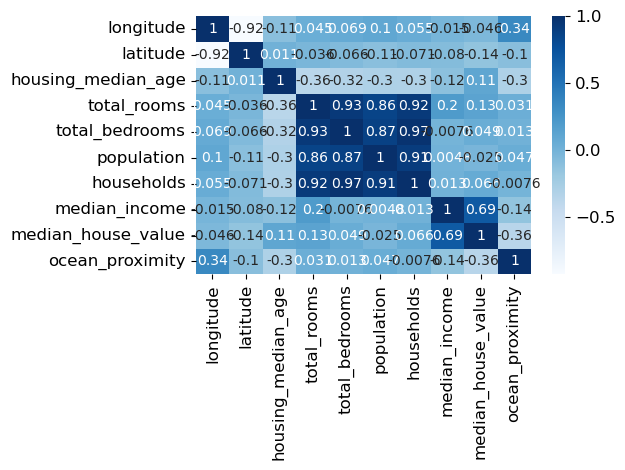

In [33]:
import seaborn as sb
corr = housing.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
save_fig("attribute_heatmap_plots")

In [34]:
# first high correlated column 'total_rooms', 'total_bedrooms', 'population', 'households'.
# second correlated column: 'median_house_value', 'median_income'
# in regression: try remove lower correlation columns like ('housing_median_age', 'longitude', 'latitude', 'ocean_proximity')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
#TODO: create model with columns ('total_rooms', 'total_bedrooms', 'population', 'households', 
#      'median_house_value', 'median_income')

In [ ]:
# median income not in USD (scaled 30,000 => 3)
# median value and age are capped (correct labels, remove them)
# different scales
# tails

In [ ]:
# move to Data Vistualization befor deal with creating test set.

## Create a Test Set

In [9]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # unsort data and get index from our data index length
    test_set_size = int(len(data) * test_ratio) # get randam index
    test_indices = shuffled_indices[:test_set_size] # copy data from 0 to test_set_size
    train_indices = shuffled_indices[test_set_size:] # copy data from test_set_size to last length
    return data.iloc[train_indices], data.iloc[test_indices] # iloc => retreive data located at indexes: train_indices, test_indices

In [156]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [157]:
len(test_set)

4128

In [158]:
# if data increase by new data? then index will be incorrect.
# solve: 
#        use hash code like crc32:

from zlib import crc32

# identifier => data index, any column represent index in data.
# function will make hasing for index column and split data to train and test,
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 # & 0xffffffff in python2 crc32 return unsigned number, we need to covert it to sign number

# function to split data
# id_column => column name identifier
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column] # hold column data
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # apply function: use column data and apply lambda anonymous funcion (inline function)
    #  one line anonymous function
    # id_: input from column
    # return: test_set_check(id_, test_ratio)
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [159]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [160]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [172]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [171]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [176]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [177]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
8       8    -122.26     37.84                42.0       2555.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   
12     12    -122.26     37.85                52.0       2491.0   
13     13    -122.26     37.84                52.0        696.0   

    total_bedrooms  population  households  median_income  median_house_value  \
8            665.0      1206.0       595.0         2.0804            226700.0   
10           434.0       910.0       402.0         3.2031            281500.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
12           474.0      1098.0       468.0         3.0750            213500.0   
13           191.0       345.0       174.0         2.6736            191300.0   

   ocean_proximity         id  
8         NEAR BAY -122222.16  
10        NEAR BAY -122222.15  
11        NEAR BAY -122222.15  
12        NEAR BAY -122222.15  
13        NEAR BAY -122222.16

In [178]:
dummyData = pd.DataFrame({'a':[0,1,2,3,4,5,6,7,8,9], 'b':[0,1,2,3,4,5,6,7,8,9]})
dummyData

a  b
0  0  0
1  1  1
2  2  2
3  3  3
4  4  4
5  5  5
6  6  6
7  7  7
8  8  8
9  9  9

In [179]:
t_set, ts_set = split_train_test_by_id(dummyData, 0.2, "a")
t_set

a  b
0  0  0
1  1  1
2  2  2
3  3  3
6  6  6
7  7  7
8  8  8
9  9  9

In [180]:
ts_set

a  b
4  4  4
5  5  5

In [181]:
## will add more more data:
dummyData = pd.DataFrame({'a':[0,1,2,3,4,5,6,7,8,9,10,11,12,13], 'b':[0,1,2,3,4,5,6,7,8,9,10,11,12,13]})
dummyData

a   b
0    0   0
1    1   1
2    2   2
3    3   3
4    4   4
5    5   5
6    6   6
7    7   7
8    8   8
9    9   9
10  10  10
11  11  11
12  12  12
13  13  13

In [182]:
t_set, ts_set = split_train_test_by_id(dummyData, 0.2, "a")
t_set

a   b
0    0   0
1    1   1
2    2   2
3    3   3
6    6   6
7    7   7
8    8   8
9    9   9
10  10  10
12  12  12
13  13  13

In [183]:
ts_set

a   b
4    4   4
5    5   5
11  11  11

In [ ]:
# we must use hashing to keep index when data has addetional values.

In [165]:
# ready sklearn train_test_split function:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # random_state => make fix random, not change evry time run randam.

In [ ]:
# if data increase by new data? then index will be incorrect.
# solve: 
#        use hash code like crc32:

In [184]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
8       8    -122.26     37.84                42.0       2555.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   
12     12    -122.26     37.85                52.0       2491.0   
13     13    -122.26     37.84                52.0        696.0   

    total_bedrooms  population  households  median_income  median_house_value  \
8            665.0      1206.0       595.0         2.0804            226700.0   
10           434.0       910.0       402.0         3.2031            281500.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
12           474.0      1098.0       468.0         3.0750            213500.0   
13           191.0       345.0       174.0         2.6736            191300.0   

   ocean_proximity         id  
8         NEAR BAY -122222.16  
10        NEAR BAY -122222.15  
11        NEAR BAY -122222.15  
12        NEAR BAY -122222.15  
13        NEAR BAY -122222.16

<AxesSubplot:>

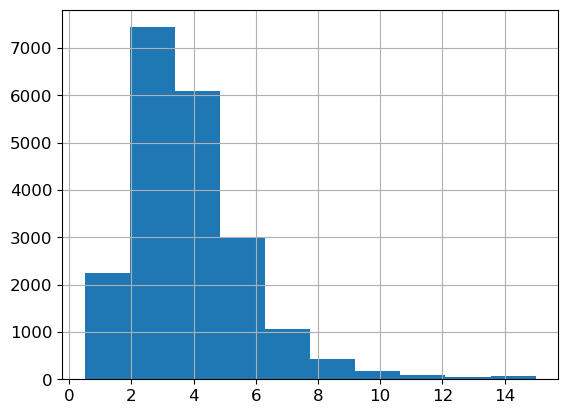

In [185]:
housing["median_income"].hist()
# from 10 it outlayers:

In [231]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.2, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

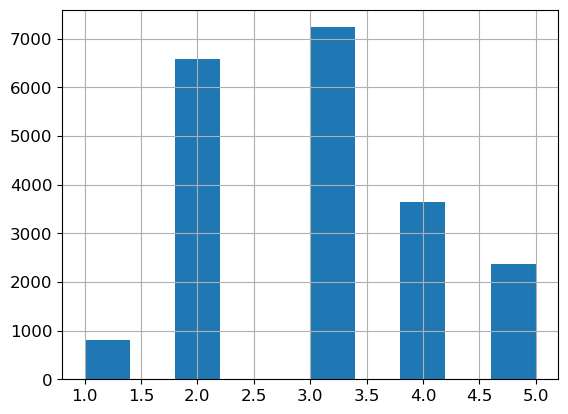

In [229]:
housing["income_cat"].hist()

In [224]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[1., 1.75, 3.0,4., 5., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

2    5817
3    5150
5    4489
4    3598
1    1427
Name: income_cat, dtype: int64

<AxesSubplot:>

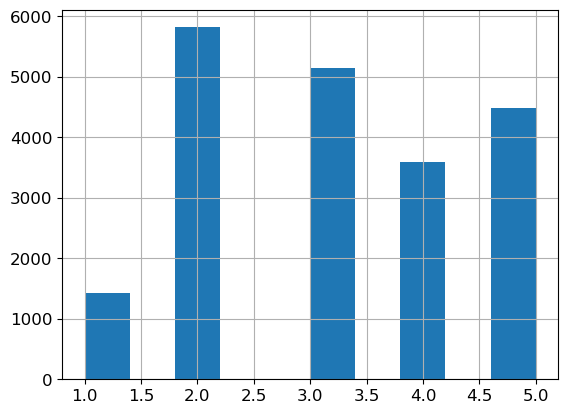

In [225]:
housing["income_cat"].hist()

In [211]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[1, 2.5, 4., 5.5, 7.5, np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

2    7748
3    4887
1    4646
4    2261
5     939
Name: income_cat, dtype: int64

<AxesSubplot:>

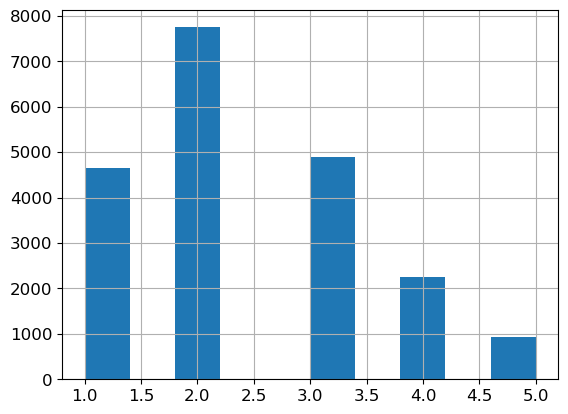

In [212]:
housing["income_cat"].hist()

<AxesSubplot:>

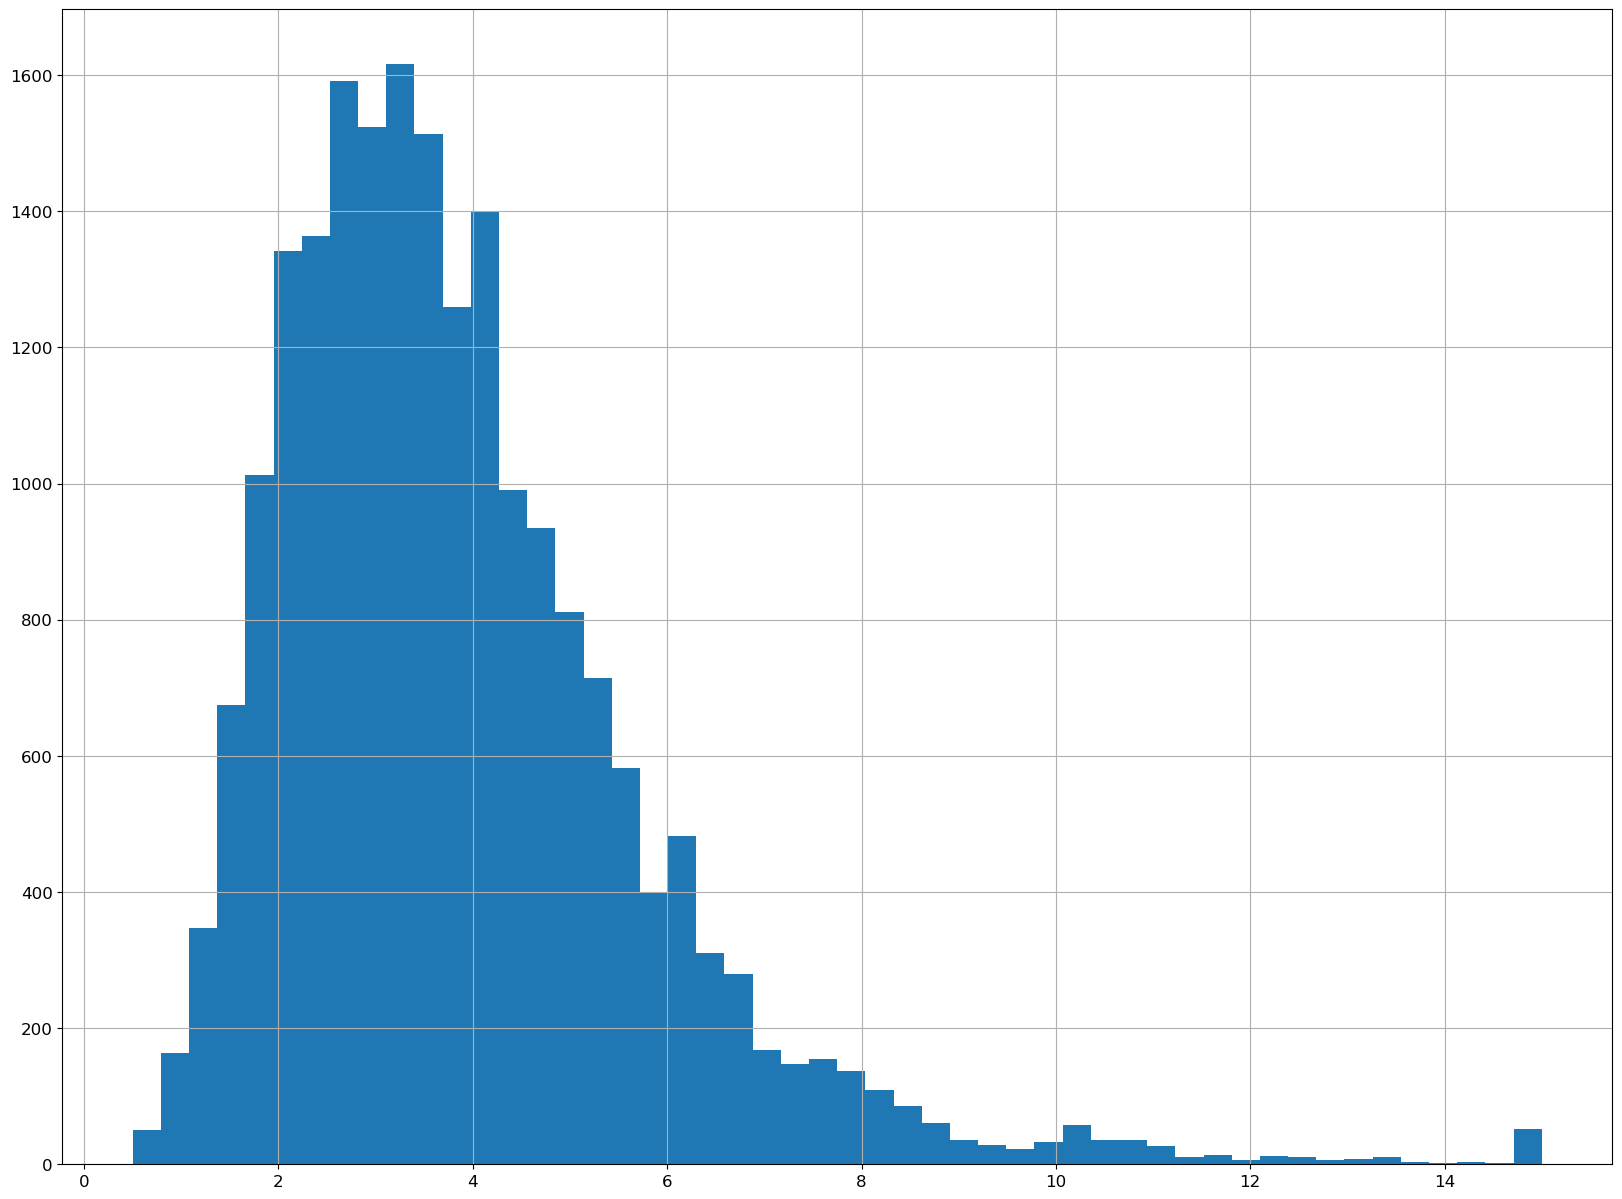

In [198]:
housing["median_income"].hist(bins=50, figsize=(20,15))

In [51]:
# modified by abdo:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4., 4.5, 5., 5.5, 6., 6.5, 7., 7.5, 8., 8.5, 9., 9.5, 10., 10.5, 11, 11.5, 12, np.inf],
                               labels=[1, 2, 3, 4, 5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
housing["income_cat"].value_counts()

In [52]:
housing["income_cat"].value_counts()

7     2720
6     2598
8     2430
5     2348
9     2086
4     1635
10    1512
11    1289
12     838
13     709
3      663
14     454
15     260
16     249
17     183
2      147
25     113
18     100
21      90
22      60
19      55
20      44
23      26
24      19
1       12
Name: income_cat, dtype: int64

<AxesSubplot:>

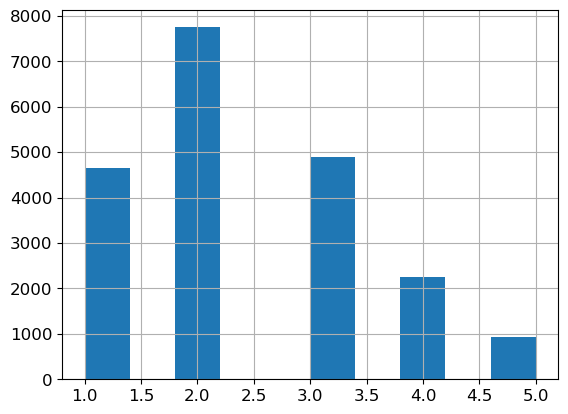

In [214]:
housing["income_cat"].hist()

In [232]:
# use StratifiedShuffleSplit to 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [233]:
# to check if train and set percentage is same? we use strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# and housing["income_cat"].value_counts() / len(housing), same data must output.
# sometimes StratifiedShuffleSplit function use in y column.

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [234]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [235]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [236]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674

In [237]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674

In [50]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674

In [239]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [240]:
housing = strat_train_set.copy()

In [ ]:
# To kick off our visualization journey, we began by plotting the distribution of house prices 
# across the state of California using a scatterplot:

## Visualizing Geographical Data

Saving figure bad_visualization_plot


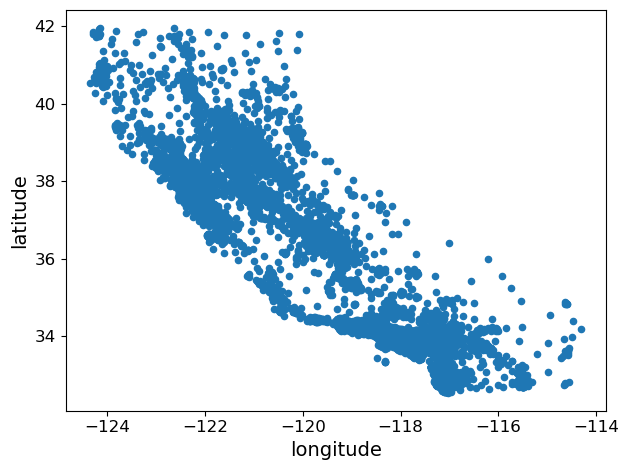

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


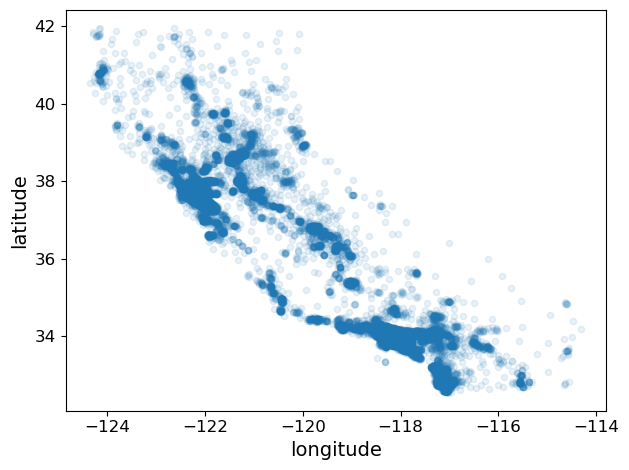

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In [ ]:
# Further analysis of the data reveals several key factors influencing house prices in California:

Saving figure median_house_value_scatterplot


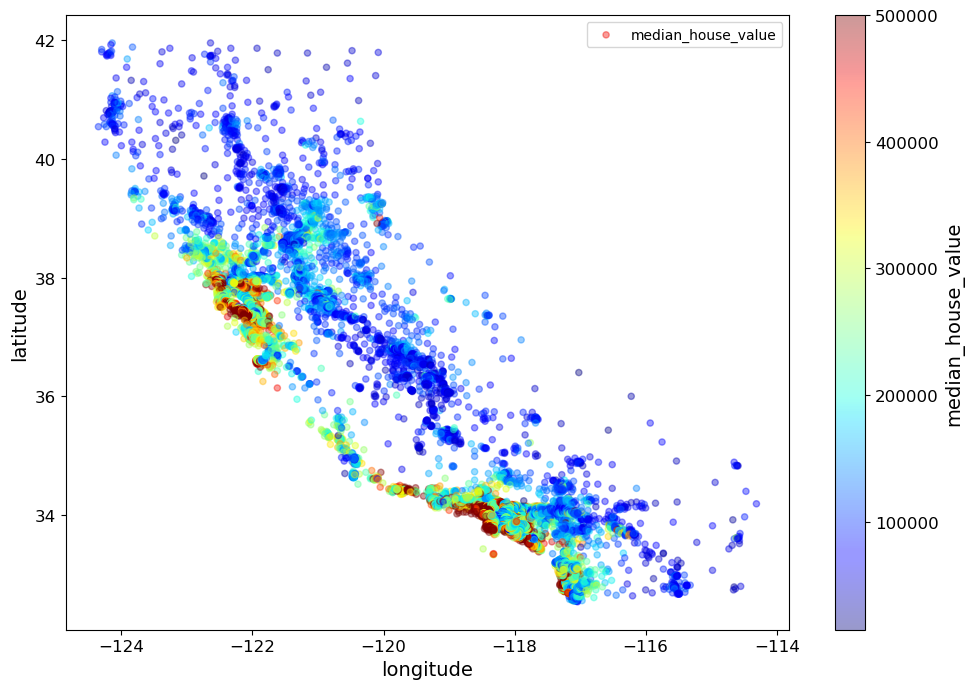

In [42]:
# median_house_value
# it's evident that house prices in cities like Los Angeles, San Francisco, and Oakland are significantly higher compared to 
# other parts of California. Additionally, houses near the coastal areas command higher prices than those inland. 
    
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             # s=housing["median_house_value"] * 30000, 
             label="median_house_value", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("median_house_value_scatterplot")

Saving figure median_income_scatterplot


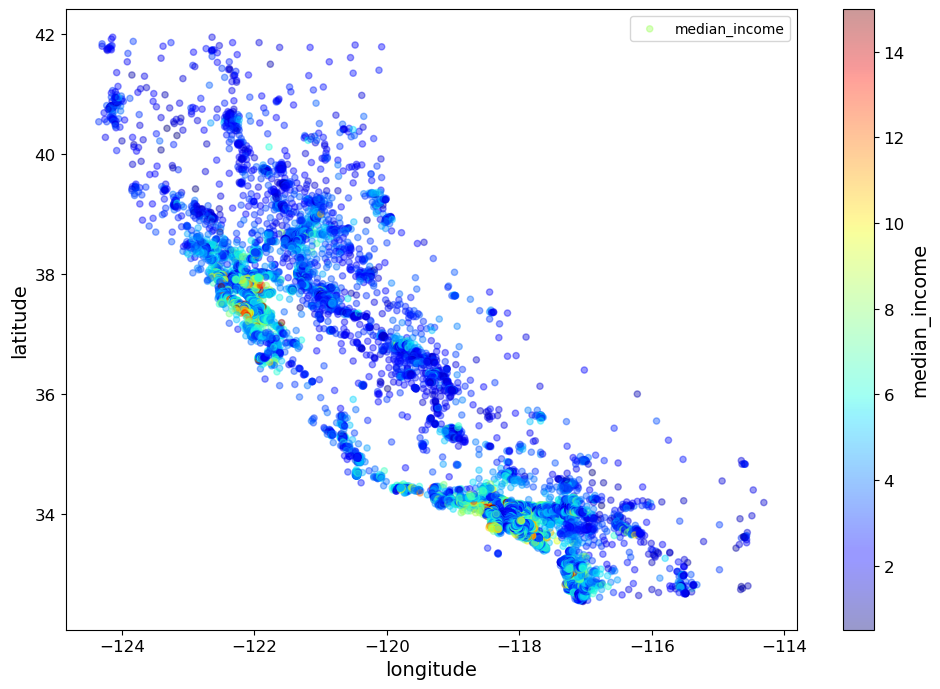

In [44]:
# 1. Income Levels: The income levels of residents in different cities play a crucial role.
# median_income
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             # s=housing["median_house_value"] * 30000, 
             label="median_income", figsize=(10,7),
             c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("median_income_scatterplot")

Saving figure ocean_proximity_scatterplot


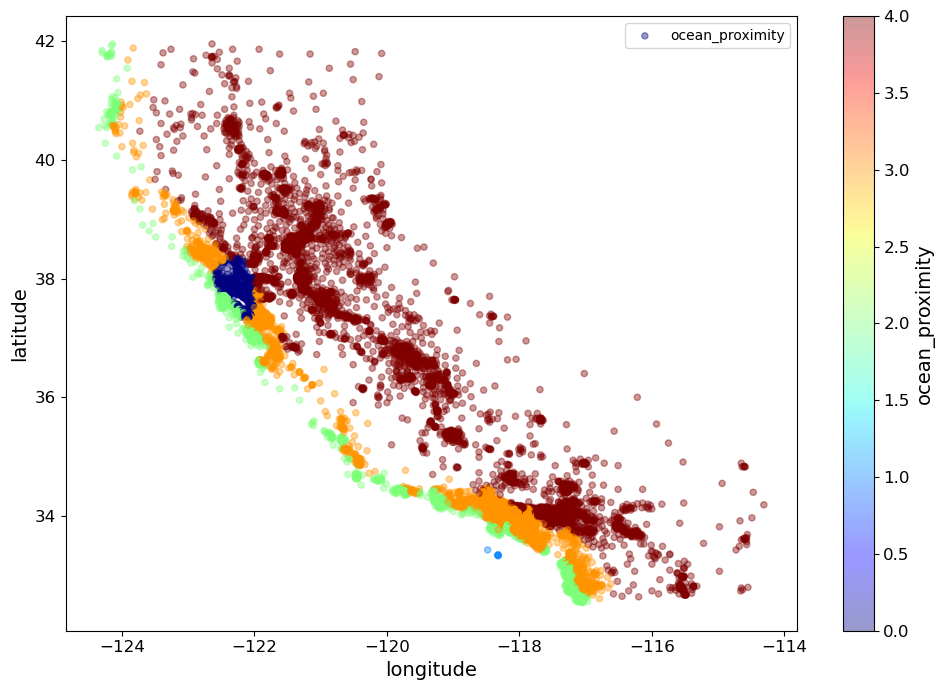

In [45]:
# 2. Ocean Proximity
# Absolutely, ocean proximity is a crucial factor influencing housing preferences in California. 
# As Americans have a strong affinity for beaches and coastal living, the distance from the ocean plays a significant 
# role in determining the desirability and consequently the price of a house. This preference for coastal living reflects the 
# cultural significance placed on beach access and seaside lifestyles, making ocean proximity a key consideration for 
# many homebuyers in California.

# ocean_proximity
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             # s=housing["median_house_value"] * 30000, 
             label="ocean_proximity", figsize=(10,7),
             c="ocean_proximity", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("ocean_proximity_scatterplot")

Saving figure population_scatterplot


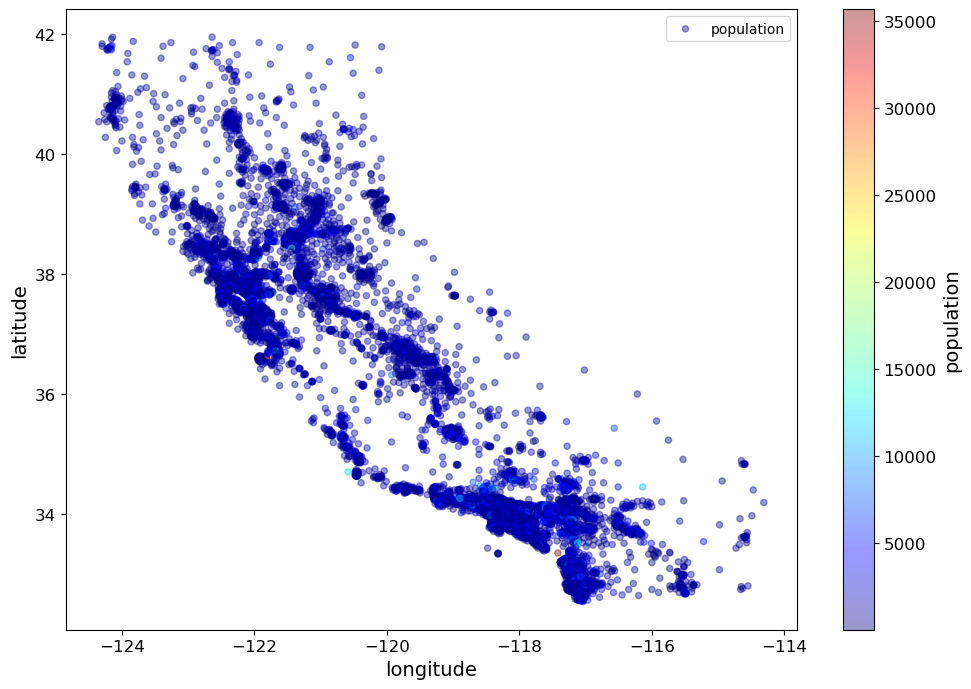

In [46]:
# 3. Population of the Cities.
# Absolutely, the population density of a city is a significant determinant of property prices. 
# In densely populated areas, where many people are vying for limited housing options, competition becomes fierce

#TODO: it is clear population debend on location, so i think classification is better.

# population
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             # s=housing["median_house_value"] * 30000, 
             label="population", figsize=(10,7),
             c="population", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("population_scatterplot")

In [ ]:
# Creating a linear regression model for the prediction of house prices:

# creating a linear regression model can indeed provide valuable insights into the factors that most significantly 
# influence the diversity of house prices across the cities of California. 

# By analyzing various parameters such as income levels, population density, ocean proximity, 
# and other demographic and economic factors, 

# we can identify which variables have the strongest correlation with housing prices. 

# This information can then be used to build a predictive model that helps forecast housing prices and understand 
# the key drivers behind their variability across different regions of California.

In [48]:
# ready sklearn train_test_split function:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
#1. Considering total number of the rooms in house as the model's parameter

X=housing[['total_rooms']]
y=housing[['median_house_value']]
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
housing['total_rooms'].max()

39320.0

In [56]:
housing['median_house_value'].max()

500001.0

(0.0, 40000.0, 0.0, 520000.0)

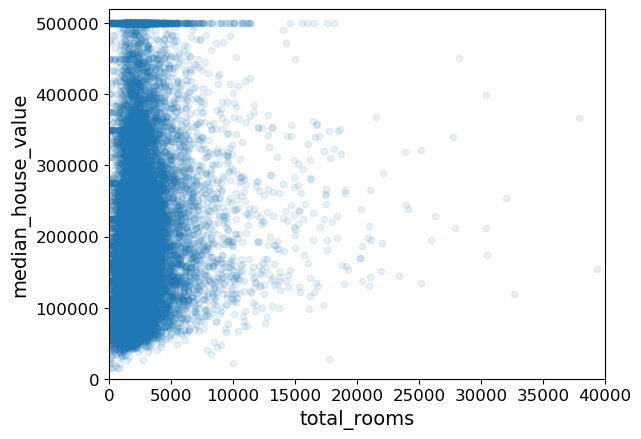

In [59]:
# 
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
housing.plot(kind="scatter", x="total_rooms", y="median_house_value",
             alpha=0.1)
plt.axis([0, 40000, 0, 520000])
#save_fig("rooms_vs_bedrooms_value_scatterplot") 

In [43]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# After analysis, it was found that the mean squared error (MSE) is lowest and consistent when using income and 
# ocean proximity as parameters.


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2=r2_score(y_test, y_pred)


print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

In [ ]:
#TODO: test 1:
# https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [ ]:
#TODO: test 2:
# https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/

In [ ]:
#TODO: test3:
# remove location and other unusefull features

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Saving figure housing_prices_scatterplot


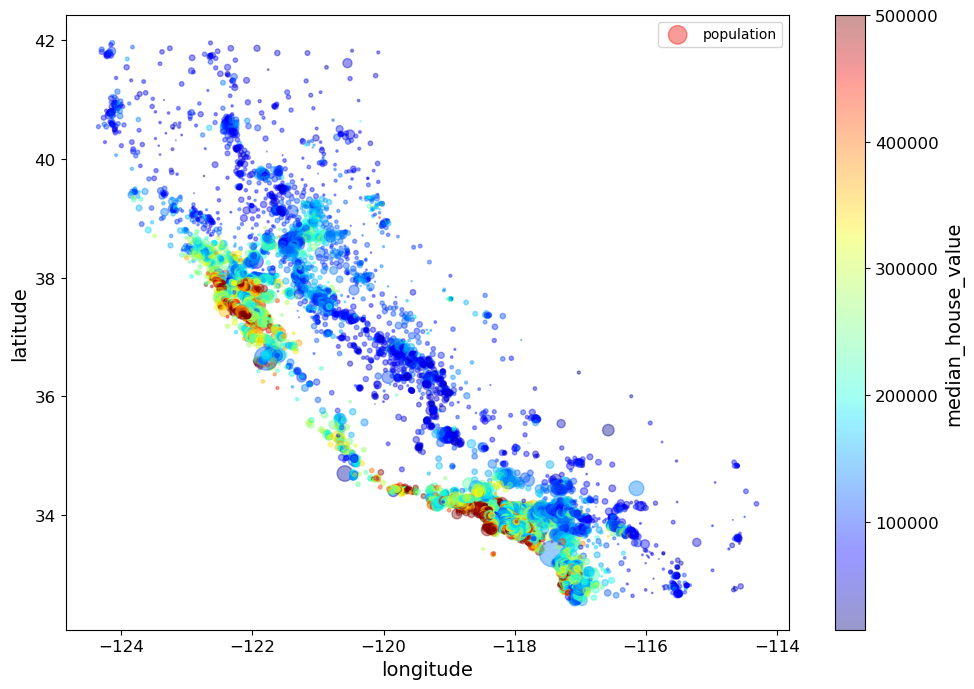

In [39]:
# median_house_value => population
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

Saving figure housing_prices_populationVSmedian_income


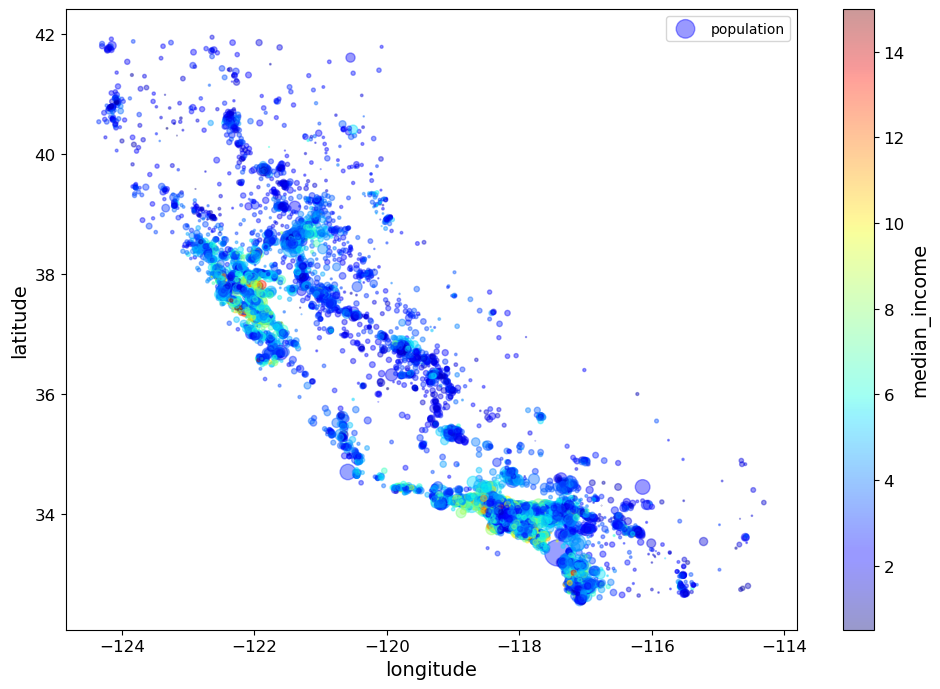

In [244]:
# median_income => population
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_populationVSmedian_income")

Saving figure housing_prices_median_house_valueVSPOPovTR


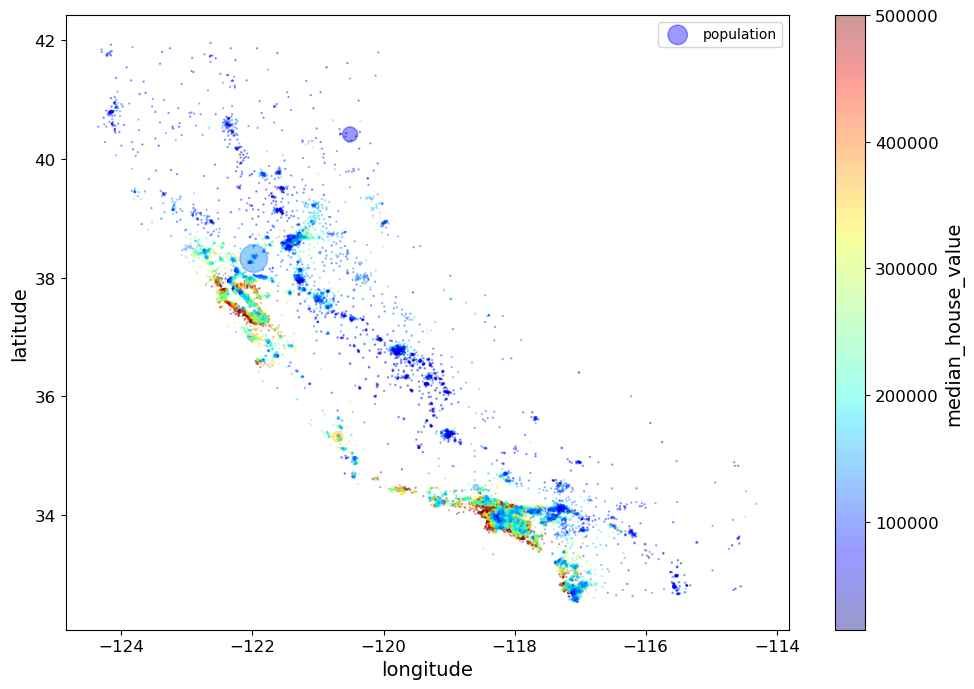

In [245]:
# median_house_value => population/total_rooms
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/housing["total_rooms"], label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_median_house_valueVSPOPovTR")

In [ ]:
# I think there is 2 place will harm model. we must solving it.

<AxesSubplot:>

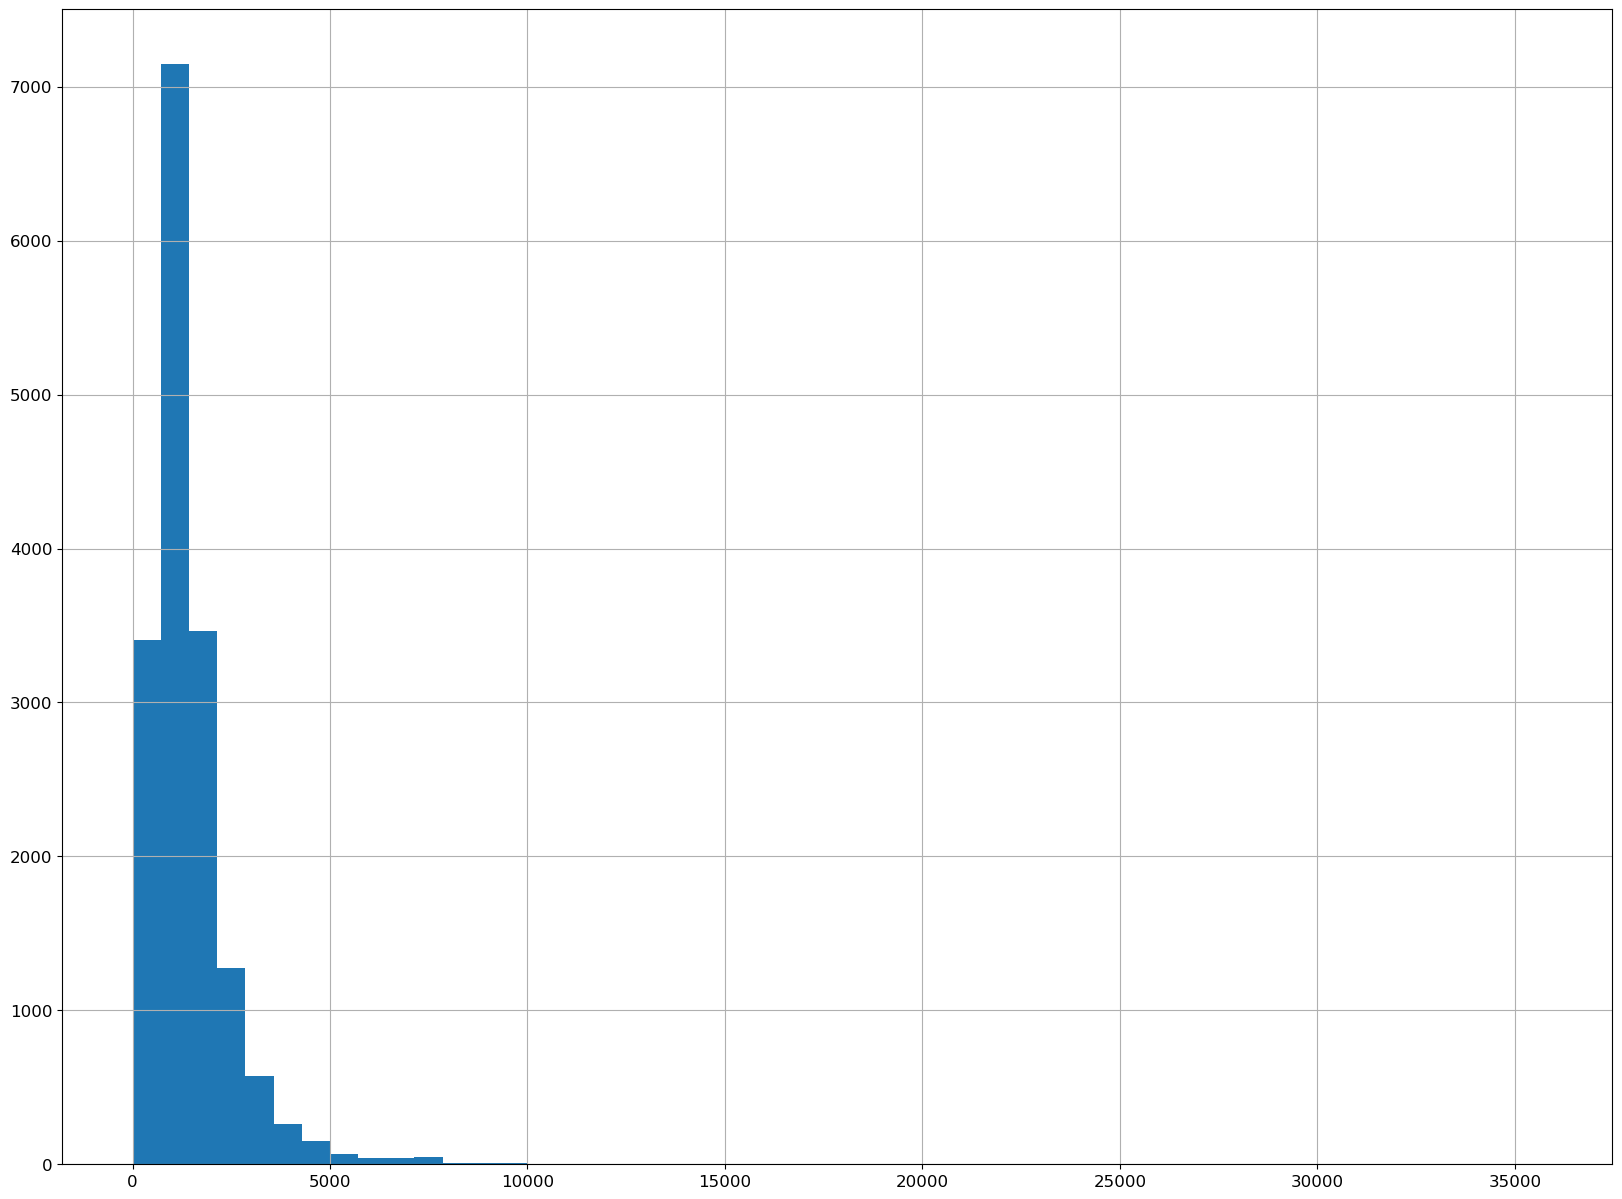

In [252]:
housing["population"].hist(bins=50, figsize=(20,15))
# bins => x
# figsize => specify figure size (width, height)

Saving figure housing_prices_median_house_valueVStotal_roomsP


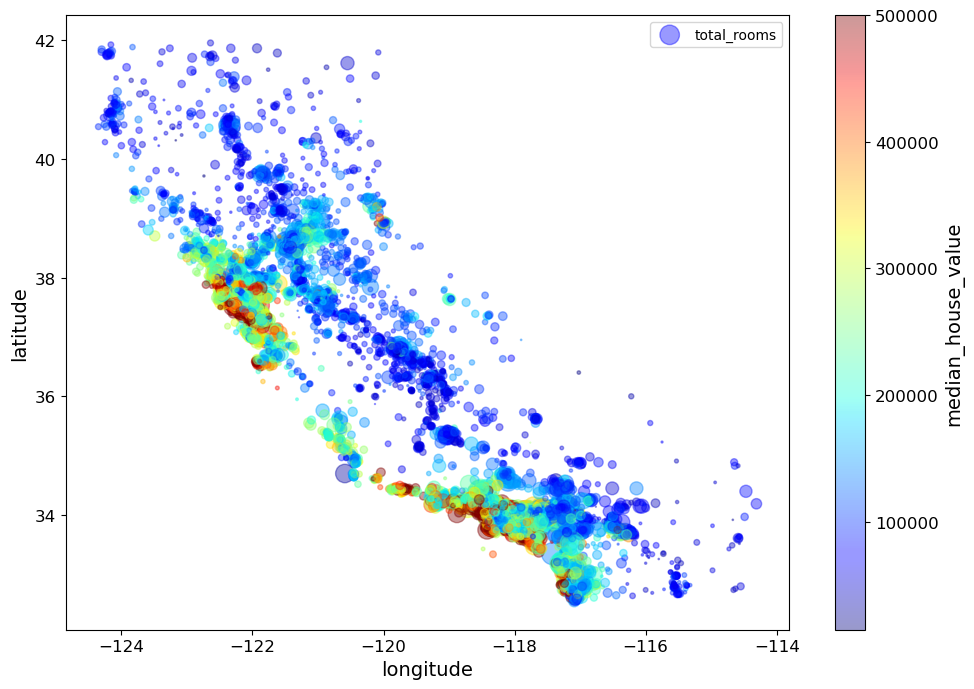

In [256]:
# median_house_value => population/total_rooms
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["total_rooms"]/100, label="total_rooms", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_median_house_valueVStotal_roomsP")

Saving figure housing_prices_median_house_valueVStotal_rooms


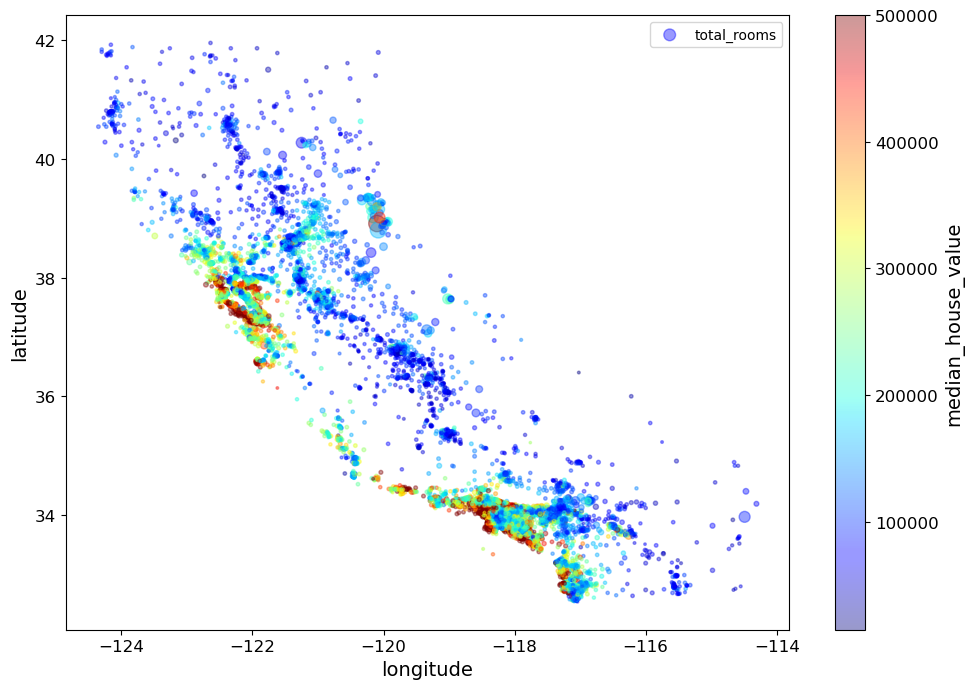

In [258]:
# median_house_value => population/total_rooms
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["total_rooms"]/housing["households"], label="total_rooms", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_median_house_valueVStotal_rooms")

In [ ]:
# I think latitude/longitude and median_house_value will be better distinguish, so better midel.
# I think latitude/longitude, median_house_value and total_rooms per households
# so it classification,

<AxesSubplot:>

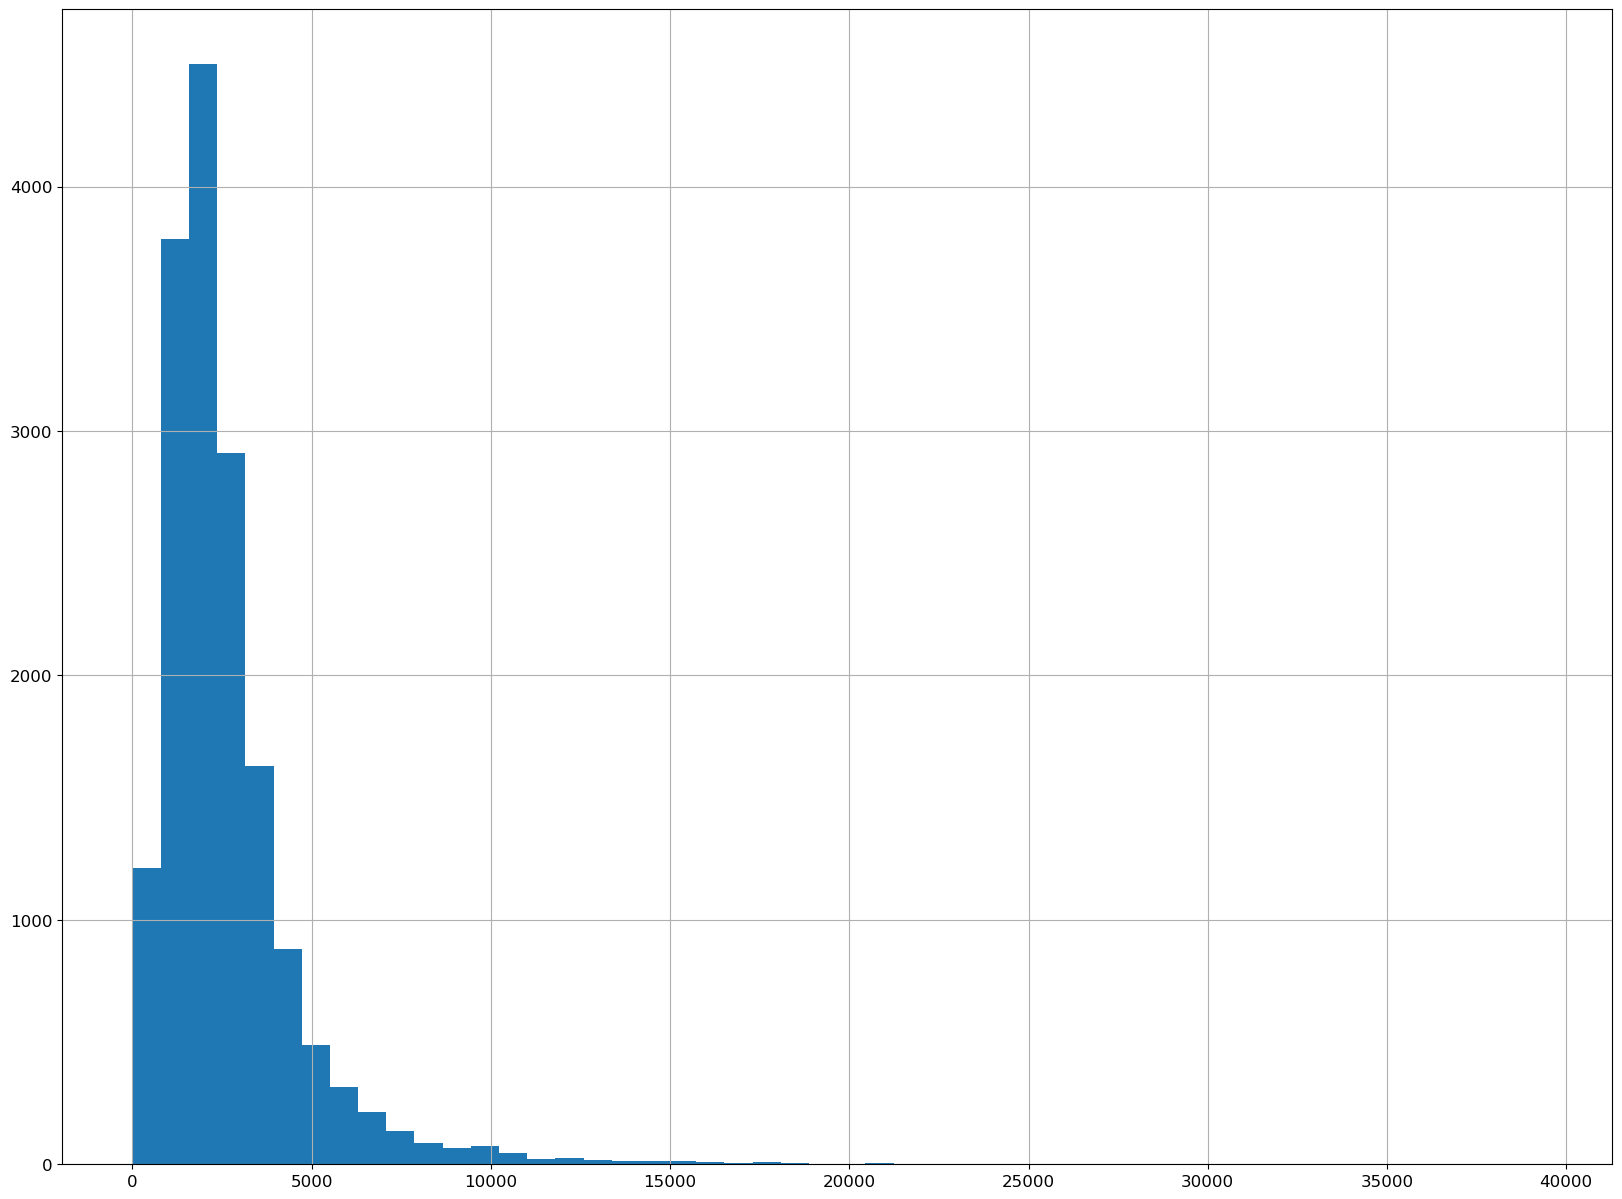

In [254]:
housing["total_rooms"].hist(bins=50, figsize=(20,15))

In [69]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x244e6976460>)

Saving figure california_housing_prices_plot


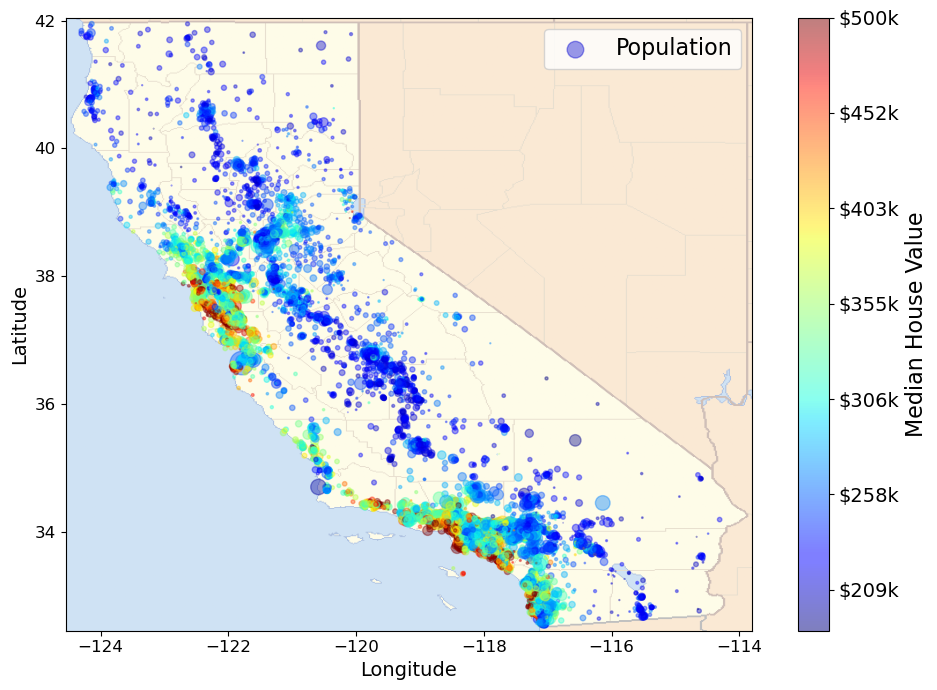

In [70]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

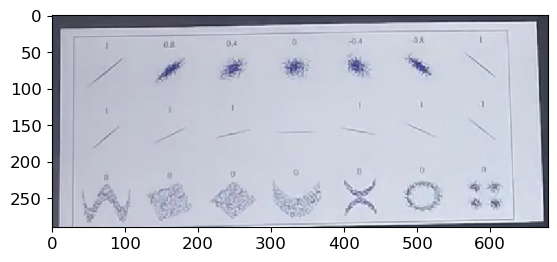

In [259]:
import matplotlib.image as mpimg

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
filename = "ML_Correlation.jpg"
# url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
ML_Correlation=mpimg.imread(os.path.join(images_path, filename))
plt.imshow(ML_Correlation)
plt.show()

## Looking for Correlations

In [260]:
corr_matrix = housing.corr()

In [261]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# median_income         0.687151

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [262]:
corr_matrix["total_rooms"].sort_values(ascending=False)
# total_bedrooms        0.929391
# households            0.918396
# population            0.855103

total_rooms           1.000000
total_bedrooms        0.929391
households            0.918396
population            0.855103
median_income         0.200133
median_house_value    0.135140
longitude             0.048909
latitude             -0.039245
housing_median_age   -0.364535
Name: total_rooms, dtype: float64

In [263]:
corr_matrix["total_bedrooms"].sort_values(ascending=False)
# households            0.980167
# total_rooms           0.929391
# population            0.876324

total_bedrooms        1.000000
households            0.980167
total_rooms           0.929391
population            0.876324
longitude             0.076686
median_house_value    0.047781
median_income        -0.009643
latitude             -0.072550
housing_median_age   -0.325101
Name: total_bedrooms, dtype: float64

In [264]:
corr_matrix["population"].sort_values(ascending=False)
# households            0.904639
# total_bedrooms        0.876324
# total_rooms           0.855103

population            1.000000
households            0.904639
total_bedrooms        0.876324
total_rooms           0.855103
longitude             0.108071
median_income         0.002421
median_house_value   -0.026882
latitude             -0.115290
housing_median_age   -0.298737
Name: population, dtype: float64

In [265]:
corr_matrix["households"].sort_values(ascending=False)
# total_bedrooms        0.980167
# total_rooms           0.918396
# population            0.904639

households            1.000000
total_bedrooms        0.980167
total_rooms           0.918396
population            0.904639
median_house_value    0.064590
longitude             0.063146
median_income         0.010869
latitude             -0.077765
housing_median_age   -0.306473
Name: households, dtype: float64

In [266]:
corr_matrix["median_income"].sort_values(ascending=False)
# median_house_value    0.687151

median_income         1.000000
median_house_value    0.687151
total_rooms           0.200133
households            0.010869
population            0.002421
total_bedrooms       -0.009643
longitude            -0.019615
latitude             -0.075146
housing_median_age   -0.111315
Name: median_income, dtype: float64

Saving figure scatter_matrix_plot2


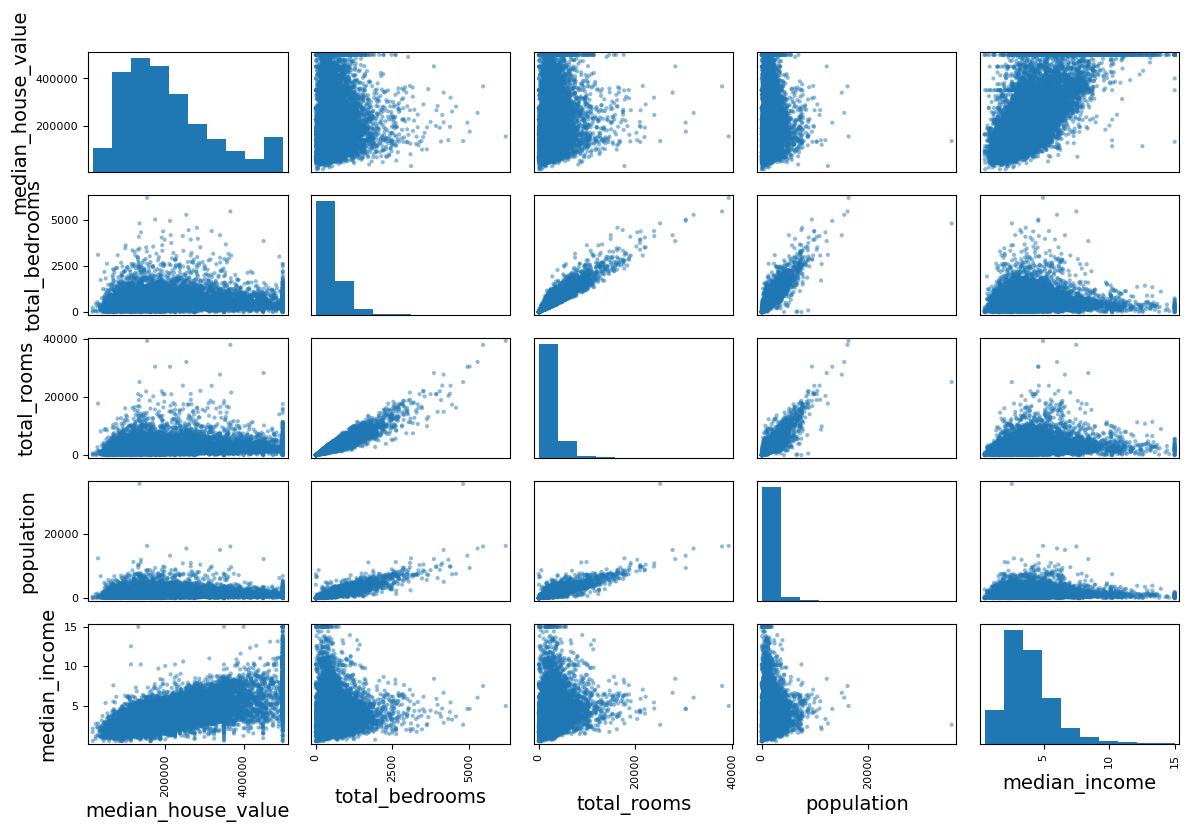

In [276]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "total_bedrooms", "total_rooms",
              "population", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot2")

In [ ]:
# "total_bedrooms", "total_rooms", "population" they best correlation, i think

In [ ]:
# we must solve outlayers

Saving figure scatter_matrix_plot


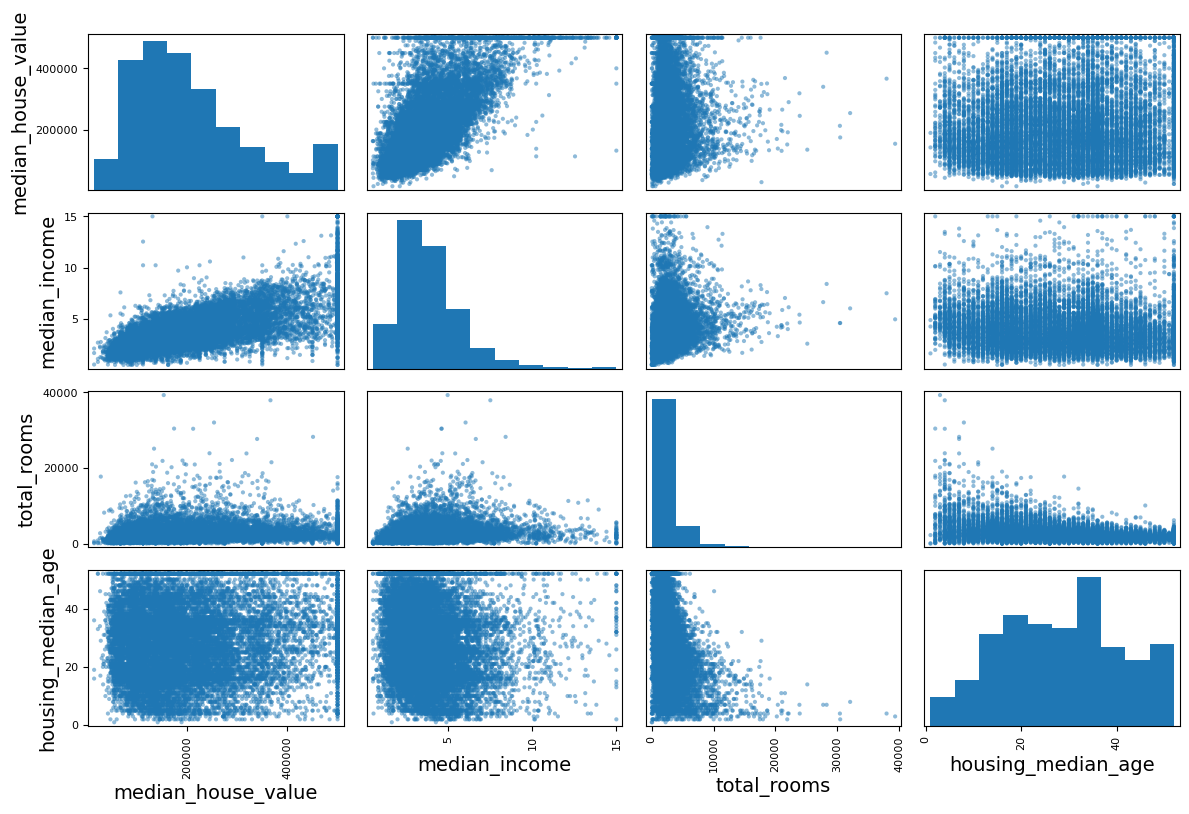

In [267]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


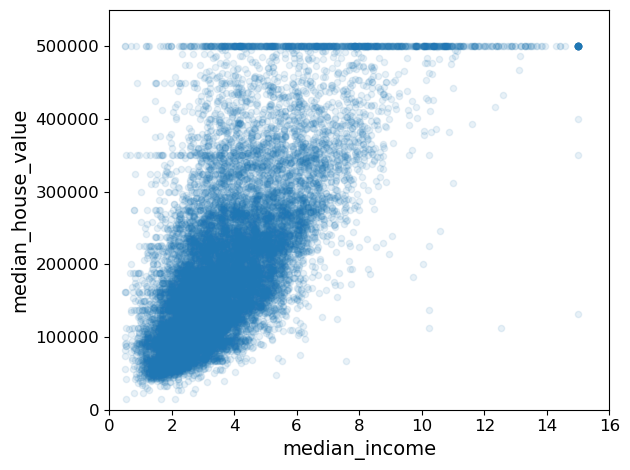

In [269]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

Saving figure rooms_vs_bedrooms_value_scatterplot


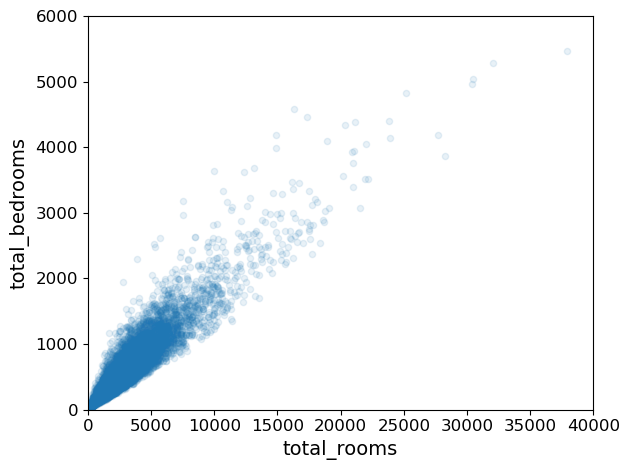

In [277]:
housing.plot(kind="scatter", x="total_rooms", y="total_bedrooms",
             alpha=0.1)
plt.axis([0, 40000, 0, 6000])
save_fig("rooms_vs_bedrooms_value_scatterplot") 

Feature Engineering:

## Experimenting with Attribute Combinations

In [278]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing["population_per_total_rooms"]=housing["population"]/housing["total_rooms"]


In [282]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
rooms_per_household           0.146255
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
population_per_household     -0.021991
population                   -0.026882
population_per_total_rooms   -0.031082
longitude                    -0.047466
latitude                     -0.142673
bedrooms_per_room            -0.259952
Name: median_house_value, dtype: float64

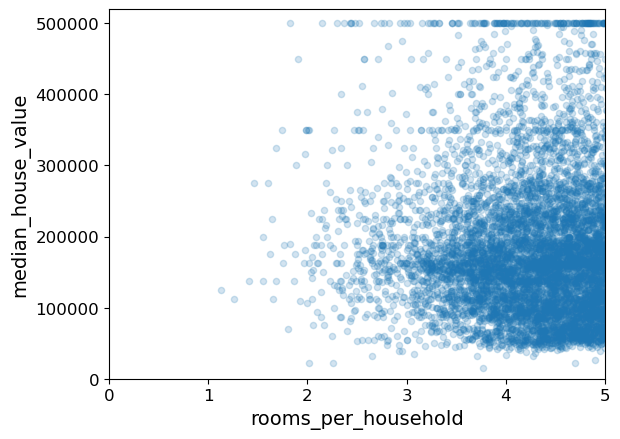

In [280]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [281]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566950   
50%        433.000000   1164.000000    408.000000       3.541550   
75%        644.000000   1719.000000    602.000000       4.745325   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16354.000000   
mean        207005.322372             5.440406           0.212873   
std         115701.297250             2.611696           0.057378   
min          14999.000000             1.130435           0.100000   
25%         119800.000000             4.442168           0.175304   
50%         179500.000000             5.232342           0.203027   
75%         263900.000000             6.056361           0.239816   
max         500001.000000           141.909091           1.000000   

       population_per_household  population_per_total_rooms  
count              16512.000000                16512.000000  
mean                   3.096469                    0.625961  
std                   11.584825                    3.232115  
min                    0.692308                    0.018109  
25%                    2.431352                    0.435318  
50%                    2.817661                    0.516006  
75%                    3.281420                    0.657231  
max                 1243.333333                  392.631579

# Prepare the Data for Machine Learning Algorithms

In [80]:
# 1. missing values
# 2. outlyaer
# 3. scaling
# 4. ocean_proximity column type is string, must convert to number. 

In [ ]:
# 1. missing values
# 3 method to deal with it:

# 1- Drop rows. if data less, problem.
# 2- Drop column. 
# 3- Imutation, repleace null values by: mean, median, average, ML model predect null values, ...



In [284]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set, drop column median_house_value from dataset
housing_labels = strat_train_set["median_house_value"].copy()

In [1]:
housing.describe()

NameError: name 'housing' is not defined

In [286]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

## Data Cleaning

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [2]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

NameError: name 'housing' is not defined

In [82]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [83]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

longitude  latitude  housing_median_age  total_rooms  population  \
13706    -117.22     34.11                26.0       2972.0      1972.0   
3024     -119.46     35.14                30.0       2943.0      1565.0   
538      -122.28     37.78                29.0       5154.0      3741.0   
15479    -117.14     33.16                16.0       1660.0       733.0   
9845     -121.90     36.58                31.0       1431.0       704.0   

       households  median_income ocean_proximity  
13706       532.0         2.0388          INLAND  
3024        584.0         2.5313          INLAND  
538        1273.0         2.5762        NEAR BAY  
15479       214.0         5.6874       <1H OCEAN  
9845        393.0         3.1977      NEAR OCEAN

In [84]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [85]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13706    -117.22     34.11                26.0       2972.0           435.0   
3024     -119.46     35.14                30.0       2943.0           435.0   
538      -122.28     37.78                29.0       5154.0           435.0   
15479    -117.14     33.16                16.0       1660.0           435.0   
9845     -121.90     36.58                31.0       1431.0           435.0   

       population  households  median_income ocean_proximity  
13706      1972.0       532.0         2.0388          INLAND  
3024       1565.0       584.0         2.5313          INLAND  
538        3741.0      1273.0         2.5762        NEAR BAY  
15479       733.0       214.0         5.6874       <1H OCEAN  
9845        704.0       393.0         3.1977      NEAR OCEAN

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [87]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [88]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [89]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  435.    , 1167.    ,
        410.    ,    3.5334])

Check that this is the same as manually computing the median of each attribute:

In [90]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  435.    , 1167.    ,
        410.    ,    3.5334])

Transform the training set:

In [91]:
X = imputer.transform(housing_num)

In [92]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [93]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13706    -117.22     34.11                26.0       2972.0           435.0   
3024     -119.46     35.14                30.0       2943.0           435.0   
538      -122.28     37.78                29.0       5154.0           435.0   
15479    -117.14     33.16                16.0       1660.0           435.0   
9845     -121.90     36.58                31.0       1431.0           435.0   

       population  households  median_income  
13706      1972.0       532.0         2.0388  
3024       1565.0       584.0         2.5313  
538        3741.0      1273.0         2.5762  
15479       733.0       214.0         5.6874  
9845        704.0       393.0         3.1977

In [94]:
imputer.strategy

'median'

In [95]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [96]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19948    -119.36     36.21                25.0       1170.0           259.0   
6349     -117.94     34.15                33.0        859.0           144.0   
19922    -119.35     36.32                10.0       3817.0           719.0   
13232    -117.68     34.14                 4.0       4791.0           695.0   
12350    -116.50     33.81                26.0       5032.0          1229.0   

       population  households  median_income  
19948       804.0       257.0         1.3889  
6349        421.0       138.0         4.4821  
19922      1686.0       714.0         3.8235  
13232      1871.0       659.0         6.9532  
12350      3086.0      1183.0         2.5399

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [97]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
19948          INLAND
6349           INLAND
19922          INLAND
13232          INLAND
12350          INLAND
19952          INLAND
13893          INLAND
20299      NEAR OCEAN
3460        <1H OCEAN
8911        <1H OCEAN

In [98]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.]])

In [99]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [100]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [101]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [102]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [103]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

Let's create a custom transformer to add extra attributes:

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [105]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [106]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
19948   -119.36    36.21               25.0      1170.0          259.0   
6349    -117.94    34.15               33.0       859.0          144.0   
19922   -119.35    36.32               10.0      3817.0          719.0   
13232   -117.68    34.14                4.0      4791.0          695.0   
12350    -116.5    33.81               26.0      5032.0         1229.0   

      population households median_income ocean_proximity rooms_per_household  \
19948      804.0      257.0        1.3889          INLAND            4.552529   
6349       421.0      138.0        4.4821          INLAND            6.224638   
19922     1686.0      714.0        3.8235          INLAND            5.345938   
13232     1871.0      659.0        6.9532          INLAND            7.270106   
12350     3086.0     1183.0        2.5399          INLAND            4.253593   

      population_per_household  
19948                 3.128405  
6349                  3.050725  
19922                 2.361345  
13232                  2.83915  
12350                 2.608622

## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [108]:
housing_num_tr

array([[ 1.06240030e-01,  2.69386026e-01, -2.87147190e-01, ...,
        -3.73449933e-01,  5.71193727e-03,  1.16270488e-01],
       [ 8.15657843e-01, -6.95667870e-01,  3.48564262e-01, ...,
         3.48559990e-01, -1.40245846e-03, -7.02595802e-01],
       [ 1.11235930e-01,  3.20918030e-01, -1.47910616e+00, ...,
        -3.08589405e-02, -6.45399564e-02, -3.86650916e-01],
       ...,
       [-1.43249720e+00,  1.01425772e+00,  1.85837896e+00, ...,
        -1.95200716e-01, -1.17474988e-01, -1.02985753e-01],
       [ 9.55543045e-01, -7.00352598e-01, -1.39964223e+00, ...,
         1.04427653e+00,  1.35350424e-02, -1.28727725e+00],
       [-1.25764069e+00,  9.39302080e-01,  2.69100331e-01, ...,
        -5.74083748e-03, -1.85941341e-02, -5.14564474e-01]])

In [109]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [110]:
housing_prepared

array([[ 0.10624003,  0.26938603, -0.28714719, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81565784, -0.69566787,  0.34856426, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11123593,  0.32091803, -1.47910616, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.4324972 ,  1.01425772,  1.85837896, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95554305, -0.7003526 , -1.39964223, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25764069,  0.93930208,  0.26910033, ...,  0.        ,
         1.        ,  0.        ]])

In [111]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [113]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [114]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [115]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.10624003,  0.26938603, -0.28714719, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81565784, -0.69566787,  0.34856426, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11123593,  0.32091803, -1.47910616, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.4324972 ,  1.01425772,  1.85837896, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95554305, -0.7003526 , -1.39964223, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25764069,  0.93930208,  0.26910033, ...,  0.        ,
         1.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [116]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [118]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 50306.43914104 192138.57374193 149671.20116577 259744.94505636
 114712.55687626]


Compare against the actual values:

In [119]:
print("Labels:", list(some_labels))

Labels: [50200.0, 220100.0, 94600.0, 277000.0, 94800.0]


In [120]:
some_data_prepared

array([[ 1.06240030e-01,  2.69386026e-01, -2.87147190e-01,
        -6.71411966e-01, -6.64994271e-01, -5.56630716e-01,
        -6.36265128e-01, -1.30467948e+00, -3.73449933e-01,
         5.71193727e-03,  1.16270488e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 8.15657843e-01, -6.95667870e-01,  3.48564262e-01,
        -8.13572152e-01, -9.39739171e-01, -8.98059666e-01,
        -9.46998643e-01,  3.20876735e-01,  3.48559990e-01,
        -1.40245846e-03, -7.02595802e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.11235930e-01,  3.20918030e-01, -1.47910616e+00,
         5.38549493e-01,  4.33985330e-01,  2.29636475e-01,
         5.57056016e-01, -2.52345162e-02, -3.08589405e-02,
        -6.45399564e-02, -3.86650916e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.45551245e-01, -7.00352598e

In [121]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68151.7676131109

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [122]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49310.5961514231

In [123]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [124]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [125]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [126]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68527.29941188 67435.53599043 70496.65018896 72306.06238556
 70425.24080028 72078.77057649 71330.59724615 73456.9096237
 71283.22572196 72770.77167364]
Mean: 71011.10636190258
Standard deviation: 1778.57305193789


In [127]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66935.09416938 64410.14357273 71653.38668468 69377.22589102
 67083.10226086 69527.67191519 66866.32097126 69311.32992117
 69278.75339213 68959.5675204 ]
Mean: 68340.25962988417
Standard deviation: 1919.4423714416196


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [131]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18541.556679211673

In [132]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49842.99110539 46932.43371047 51220.01119674 50355.02710238
 49679.92116322 52114.36875265 47911.99169331 50864.95353799
 50042.44419734 51029.89239027]
Mean: 49999.40348497365
Standard deviation: 1476.2280169404848


In [133]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68340.259630
std       2023.269910
min      64410.143573
25%      66972.096192
50%      69119.160456
75%      69360.751899
max      71653.386685
dtype: float64

In [98]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [134]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Failed to detect a GPU.


# Fine-Tune Your Model

## Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [100]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [101]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [102]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [103]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.050905      0.004097         0.002766        0.000256   
1        0.143706      0.002170         0.007205        0.000304   
2        0.410306      0.004403         0.019903        0.000964   
3        0.069762      0.000987         0.002409        0.000080   
4        0.227188      0.001444         0.006829        0.000090   
5        0.711381      0.038618         0.020686        0.001864   
6        0.094580      0.003861         0.002426        0.000118   
7        0.311034      0.005247         0.006980        0.000283   
8        0.979656      0.048790         0.021028        0.001812   
9        0.118484      0.001009         0.002239        0.000068   
10       0.401726      0.005465         0.007028        0.000345   
11       1.236572      0.036875         0.019325        0.000252   
12       0.064666      0.001042         0.002780        0.000240   
13       0.213941      0.000996         0.007956        0.000267   
14       0.090480      0.003167         0.002681        0.000082   
15       0.286396      0.004578         0.008019        0.000384   
16       0.109239      0.002999         0.003399        0.001579   
17       0.370459      0.017424         0.007863        0.000056   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -3.837622e+09   
1             {'max_features': 2, 'n_estimators': 10}      -3.047771e+09   
2             {'max_features': 2, 'n_estimators': 30}      -2.689185e+09   
3              {'max_features': 4, 'n_estimators': 3}      -3.730181e+09   
4             {'max_features': 4, 'n_estimators': 10}      -2.666283e+09   
5             {'max_features': 4, 'n_estimators': 30}      -2.387153e+09   
6              {'max_features': 6, 'n_estimators': 3}      -3.119657e+09   
7             {'max_features': 6, 'n_estimators': 10}      -2.549663e+09   
8             {'max_features': 6, 'n_estimators': 30}      -2.370010e+09   
9              {'max_features': 8, 'n_estimators': 3}      -3.353504e+09   
10            {'max_features': 8, 'n_estimators': 10}      -2.571970e+09   
11            {'max_features': 8, 'n_estimators': 30}      -2.357390e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -3.785816e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -2.810721e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -3.618324e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -2.757999e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -3.134040e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -2.525578e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -4.147108e+09  ...    -4.053756e+09  

## Randomized Search

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd1b96682d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd1b9668b10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [107]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [108]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [109]:
final_rmse

47730.22690385927

We can compute a 95% confidence interval for the test RMSE:

In [110]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

We could compute the interval manually like this:

In [111]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776014, 49691.25001877871)

Alternatively, we could use a z-scores rather than t-scores:

In [112]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136594, 49690.68623889426)

# Extra material

## A full pipeline with both preparation and prediction

In [113]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## Model persistence using joblib

In [114]:
my_model = full_pipeline_with_predictor

In [115]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

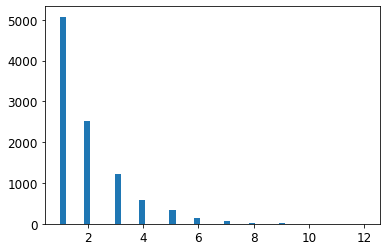

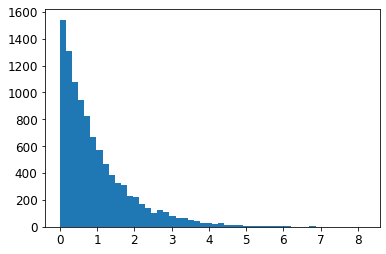

In [116]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

**Warning**: the following cell may take close to 30 minutes to run, or more depending on your hardware.

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   3.9s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   3.9s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.6s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   4.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.4min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [118]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.84006944533

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [119]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.2s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.0s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.5s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.5s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   4.3s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   8.6s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   9.1s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   8.8s
[CV] C=26290.2

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 44.0min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9bd002c790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9bd002cb10>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [121]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.960710084146

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [122]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

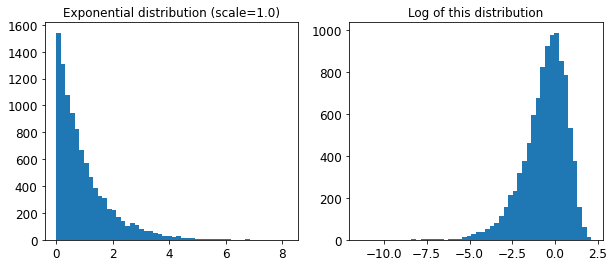

In [123]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

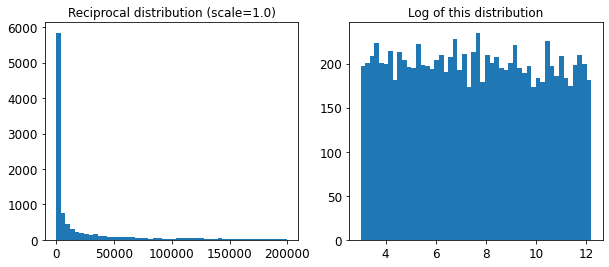

In [124]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [125]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [126]:
k = 5

Now let's look for the indices of the top k features:

In [127]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [128]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [129]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [130]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [131]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [132]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

Now let's double check that these are indeed the top k features:

In [133]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [134]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [135]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

Let's try the full pipeline on a few instances:

In [136]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [203214.28978849 371846.88152572 173295.65441612  47328.3970888 ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

**Note:** In the code below, I've set the `OneHotEncoder`'s `handle_unknown` hyperparameter to `'ignore'`, to avoid warnings during training. Without this, the `OneHotEncoder` would default to `handle_unknown='error'`, meaning that it would raise an error when transforming any data containing a category it didn't see during training. If we kept the default, then the `GridSearchCV` would run into errors during training when evaluating the folds in which not all the categories are in the training set. This is likely to happen since there's only one sample in the `'ISLAND'` category, and it may end up in the test set in some of the folds. So some folds would just be dropped by the `GridSearchCV`, and it's best to avoid that.

In [137]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   5.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.7s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.7s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   5.1s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   4.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 42.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [138]:
grid_search_prep.best_params_

{'feature_selection__k': 15,
 'preparation__num__imputer__strategy': 'most_frequent'}

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)